# **I. Perkenalan**

```
============================================================================
Graded Challenge 6 Clustering

Nama  : Achmed Alridho Zulkarnaen
Batch : RMT-037

File ipynb ini berisikan pembuatan machine learning model yang dapat melakukan customer segmentation dari data kartu kredit.
============================================================================
```

## Latar Belakang

Sebagai Data Scientist di Bank ABC, saya bertanggung jawab menganalisis dan mengidentifikasi pola perilaku nasabah untuk mendukung strategi bisnis yang lebih efektif. Salah satu caranya adalah melakukan Customer Segmentation, yaitu mengelompokkan nasabah berdasarkan karakteristik dan pola penggunaan kartu kredit mereka. Bank ABC telah mengumpulkan data penggunaan kartu kredit selama 6 bulan terakhir, termasuk informasi transaksi, saldo, dan penggunaan produk lainnya. Segmentasi ini bertujuan membantu tim marketing memahami profil berbagai kelompok nasabah, meningkatkan efektivitas kampanye pemasaran, dan menawarkan layanan yang lebih personal. Segmentasi yang tepat dapat mendukung peningkatan loyalitas nasabah serta memanfaatkan peluang untuk upselling dan cross-selling.

## Objective

Proyek ini bertujuan untuk membangun model clustering menggunakan teknik Machine Learning, menganalisis hasil segmentasi untuk memahami karakteristik setiap cluster, serta memberikan rekomendasi bisnis yang relevan. Selain itu, Exploratory Data Analysis (EDA) akan dilakukan untuk mendapatkan insight tambahan dari data, mendukung keputusan bisnis yang lebih baik. Dengan segmentasi ini, Bank ABC dapat mengoptimalkan strategi retensi, menawarkan produk yang lebih sesuai, dan meningkatkan kepuasan serta loyalitas nasabah.

# **II. Query SQL**

```Sql
--- Query di BigQuery ---
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_037_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 1;
```

# **III. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from phik.report import plot_correlation_matrix

import warnings
warnings.filterwarnings(action='ignore')

# **IV. Data Loading**

In [2]:
df_ori = pd.read_csv('P1G6_Set_1_alridho.csv')
df = df_ori.copy()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat indikasi adanya missing value pada column MINIMUM_PAYMENTS, semua tipe data sudah benar

In [4]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat column yang duplikat

In [5]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


Menampilkan 10 data teratas

In [6]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


Menampilkan 10 data terbawah

# **V. Exploratory Data Analysis (EDA)**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


* Dari df, terlihat bahwa sebagian besar nasabah memiliki saldo `BALANCE` yang rendah, dengan nilai rata-rata sekitar 1,563 dan terdapat variasi yang cukup besar hingga 18,495, mengindikasikan adanya outlier dengan saldo sangat tinggi.

* `BALANCE_FREQUENCY` cenderung tinggi, dengan median berada di angka 1, yang berarti nasabah sering memperbarui saldo mereka. 

* Aktivitas pembelian `PURCHASES`, memiliki rata-rata nilai sekitar 1,003 dengan pembelian satu kali `ONEOFF_PURCHASES` lebih dominan dibanding pembelian cicilan `INSTALLMENTS_PURCHASES`.

* Frekuensi pembelian `PURCHASES_FREQUENCY` menunjukkan bahwa sebagian nasabah sering melakukan pembelian, sedangkan aktivitas cash advance atau pengambilan tunai `CASH_ADVANCE` relatif jarang. 

* Rata-rata batas kredit `CREDIT_LIMIT` berada di angka 4,494, dengan banyak nasabah memiliki batas kredit di kisaran rendah hingga sedang. 

* Pembayaran minimum `MINIMUM_PAYMENTS` cukup bervariasi, menunjukkan beberapa nasabah tidak membayar penuh tagihan mereka. 

* Mayoritas nasabah memiliki lama berlangganan `TENURE` maksimum selama 12 bulan, mengindikasikan loyalitas yang cukup tinggi. 

Analisis ini menunjukkan adanya perbedaan yang cukup besar dalam perilaku nasabah, dan ini bisa jadi peluang bagi bank untuk menyesuaikan layanan serta menawarkan produk yang lebih cocok dengan kebutuhan nasabah berdasarkan karakteristik mereka.

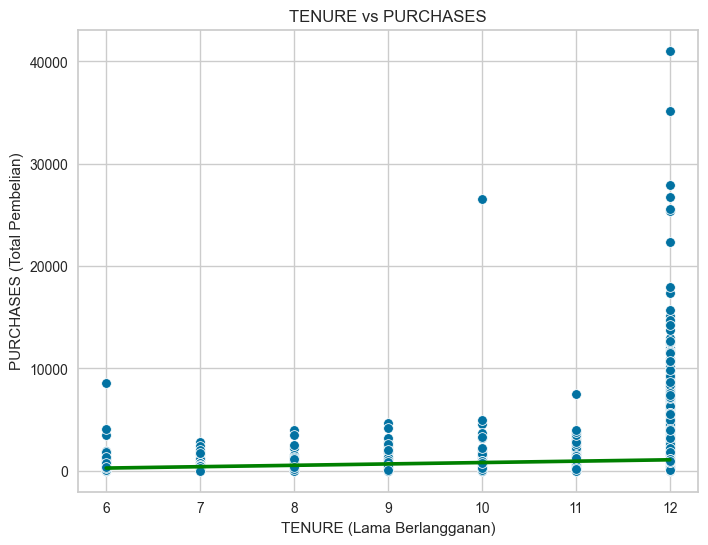

In [8]:
# Scatter plot TENURE vs PURCHASES
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TENURE', y='PURCHASES')
sns.regplot(data=df, x='TENURE', y='PURCHASES', scatter=False, color='green')
plt.title("TENURE vs PURCHASES")
plt.xlabel("TENURE (Lama Berlangganan)")
plt.ylabel("PURCHASES (Total Pembelian)")
plt.show()

Visualisasi menunjukkan adanya korelasi positif yang lemah antara lama berlangganan `tenure` dan total pembelian `purchases`, dengan peningkatan kecil yang ditunjukkan oleh garis trend. Nasabah dengan tenure lebih panjang tidak selalu melakukan pembelian lebih tinggi, kecuali pada bulan ke-12 di mana terdapat outlier dengan pembelian yang besar. Hal ini mengindikasikan potensi peningkatan pembelian pada nasabah dengan hubungan jangka panjang. Tim marketing bisa memanfaatkan temuan ini dengan menawarkan program promosi atau penawaran eksklusif untuk mendorong transaksi pada nasabah yang sudah lama berlangganan.

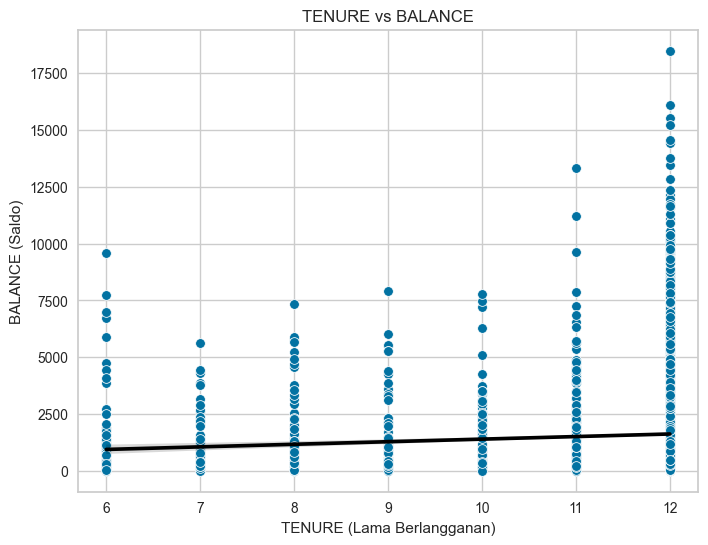

In [9]:
# Scatter plot TENURE vs BALANCE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TENURE', y='BALANCE')
sns.regplot(data=df, x='TENURE', y='BALANCE', scatter=False, color='black')
plt.title("TENURE vs BALANCE")
plt.xlabel("TENURE (Lama Berlangganan)")
plt.ylabel("BALANCE (Saldo)")
plt.show()

Pada visualisasi diatas, terlihat bahwa garis trend menunjukkan adanya korelasi positif antara `tenure dan saldo`, meskipun peningkatannya relatif kecil. Nasabah dengan tenure lebih lama cenderung memiliki saldo yang lebih tinggi, walaupun terdapat variasi dan outlier dalam data. Tim marketing dapat memanfaatkan informasi ini untuk merancang strategi retensi yang lebih efektif dan menawarkan produk tambahan kepada nasabah dengan tenure panjang dan saldo tinggi, sehingga dapat meningkatkan penggunaan layanan serta loyalitas nasabah secara keseluruhan.

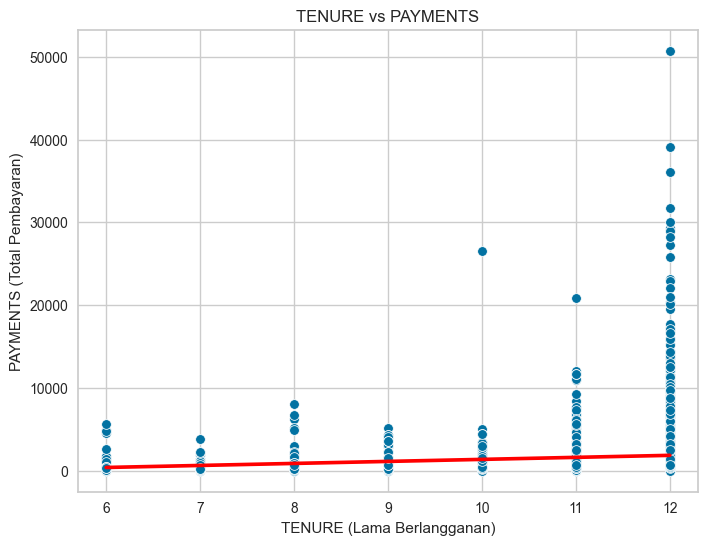

In [10]:
# Scatter plot TENURE vs PAYMENTS
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TENURE', y='PAYMENTS')
sns.regplot(data=df, x='TENURE', y='PAYMENTS', scatter=False, color='red')
plt.title("TENURE vs PAYMENTS")
plt.xlabel("TENURE (Lama Berlangganan)")
plt.ylabel("PAYMENTS (Total Pembayaran)")
plt.show()

Dari visualisasi ini, terlihat bahwa jumlah pembayaran `PAYMENTS` meningkat seiring dengan bertambahnya lama berlangganan `TENURE`, terutama pada nasabah yang sudah mencapai bulan ke-12. Hal ini menunjukkan adanya korelasi positif antara lama berlangganan dengan total pembayaran. Meskipun begitu, terdapat beberapa outlier di mana nasabah baru melakukan pembayaran tinggi. 

Kesimpulannya, nasabah dengan tenure lebih lama cenderung lebih aktif melakukan pembayaran. Tim marketing dapat memanfaatkan temuan ini dengan menawarkan program-program khusus untuk mendorong nasabah lama agar tetap aktif menggunakan layanan kartu kredit.

In [11]:
max_credit_limit = df['CREDIT_LIMIT'].max()
print("Nilai CREDIT_LIMIT terbesar:", max_credit_limit)

Nilai CREDIT_LIMIT terbesar: 30000.0


Credit Limit terbesar pada seluruh nasabah bank ABC adalah `$30.000`

Rata-rata PURCHASES_FREQUENCY untuk setiap kategori CREDIT_LIMIT:
 CREDIT_LIMIT_CATEGORY
Rendah    0.464440
Sedang    0.538394
Tinggi    0.676878
Name: PURCHASES_FREQUENCY, dtype: float64


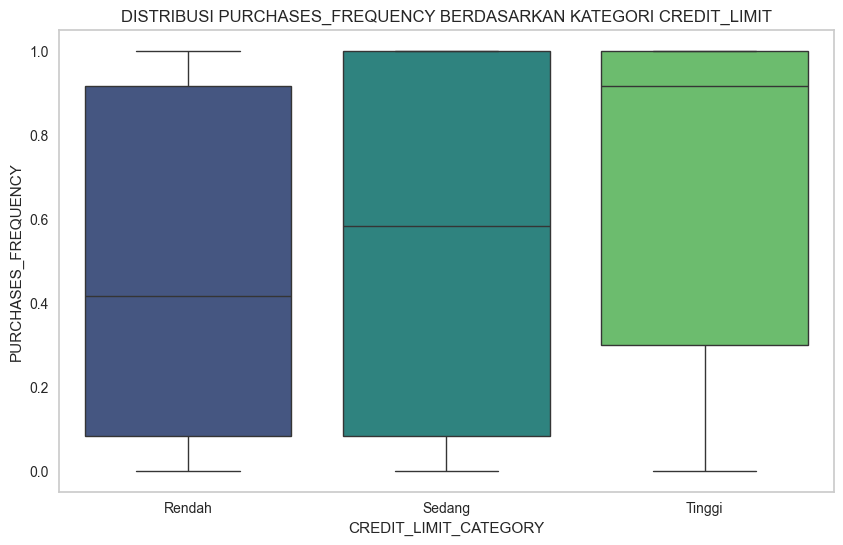

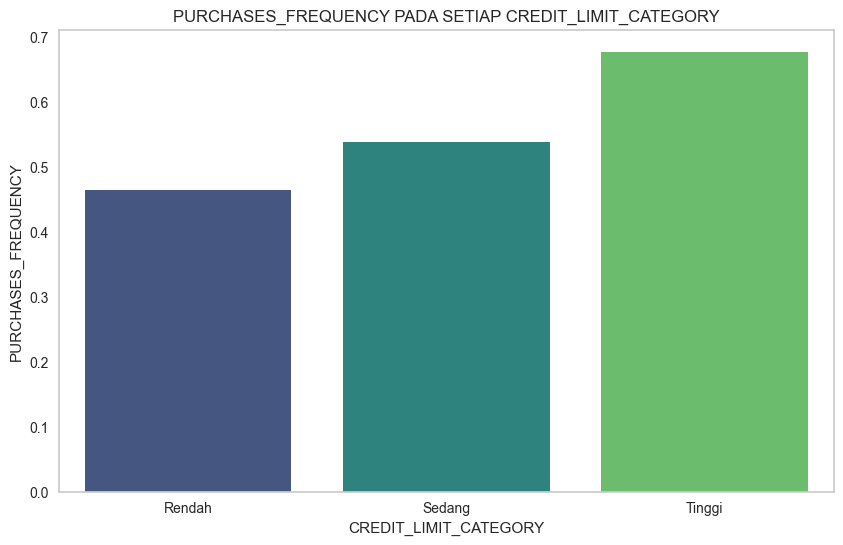

In [12]:
# Membuat kategori CREDIT_LIMIT menjadi Rendah, Sedang, dan Tinggi
bins = [0, 5000, 15000, 50000]
labels = ['Rendah', 'Sedang', 'Tinggi']

# Menambahkan kolom kategori 'CREDIT_LIMIT_CATEGORY'
df['CREDIT_LIMIT_CATEGORY'] = pd.cut(df['CREDIT_LIMIT'], bins=bins, labels=labels)

# Menghitung rata-rata PURCHASES_FREQUENCY untuk setiap kategori CREDIT_LIMIT
avg_purchases_frequency = df.groupby('CREDIT_LIMIT_CATEGORY')['PURCHASES_FREQUENCY'].mean()
print("Rata-rata PURCHASES_FREQUENCY untuk setiap kategori CREDIT_LIMIT:\n", avg_purchases_frequency)

# Membuat box plot untuk melihat distribusi PURCHASES_FREQUENCY berdasarkan kategori CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CREDIT_LIMIT_CATEGORY', y='PURCHASES_FREQUENCY', palette='viridis')
plt.title("DISTRIBUSI PURCHASES_FREQUENCY BERDASARKAN KATEGORI CREDIT_LIMIT")
plt.xlabel("CREDIT_LIMIT_CATEGORY")
plt.ylabel("PURCHASES_FREQUENCY")
plt.grid(axis='y')
plt.show()

# Membuat bar plot untuk rata-rata PURCHASES_FREQUENCY pada setiap kategori CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_purchases_frequency.index, y=avg_purchases_frequency.values, palette='viridis')
plt.title("PURCHASES_FREQUENCY PADA SETIAP CREDIT_LIMIT_CATEGORY")
plt.xlabel("CREDIT_LIMIT_CATEGORY")
plt.ylabel("PURCHASES_FREQUENCY")
plt.grid(axis='y')
plt.show()

Berdasarkan analisis visualisasi data dan rata-rata PURCHASES_FREQUENCY pada setiap kategori CREDIT_LIMIT, terlihat bahwa nasabah dengan batas kredit yang lebih tinggi cenderung lebih sering melakukan pembelian. Nasabah di kategori `Rendah` memiliki frekuensi pembelian rata-rata sekitar `0.46`, sedangkan kategori `Sedang` mencapai rata-rata `0.54`, dan kategori `Tinggi` memiliki frekuensi tertinggi dengan rata-rata `0.68`. 

Pola ini menunjukkan adanya hubungan positif antara batas kredit yang lebih tinggi dengan frekuensi pembelian yang lebih sering. Hal ini dapat dimanfaatkan oleh tim marketing untuk mempertimbangkan peningkatan limit kredit bagi nasabah yang memiliki potensi belanja tinggi, guna mendorong penggunaan kartu kredit lebih optimal dan meningkatkan pendapatan dari fee transaksi.

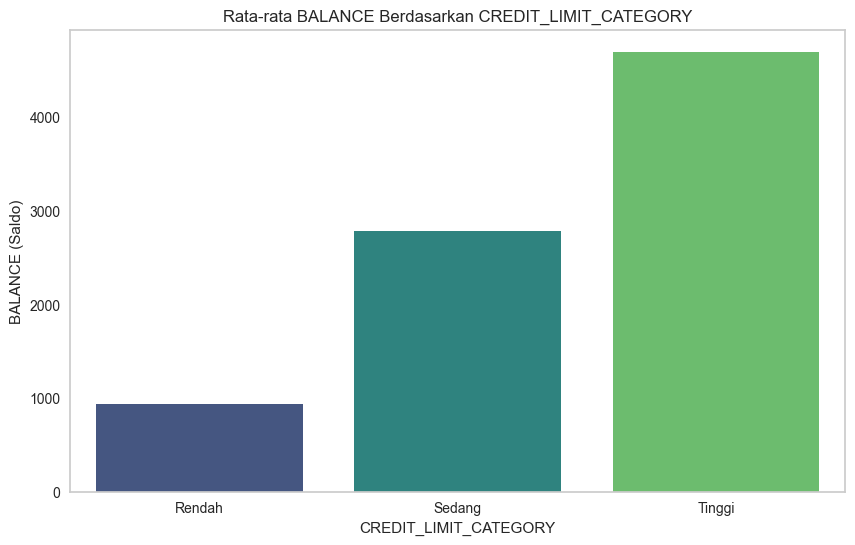

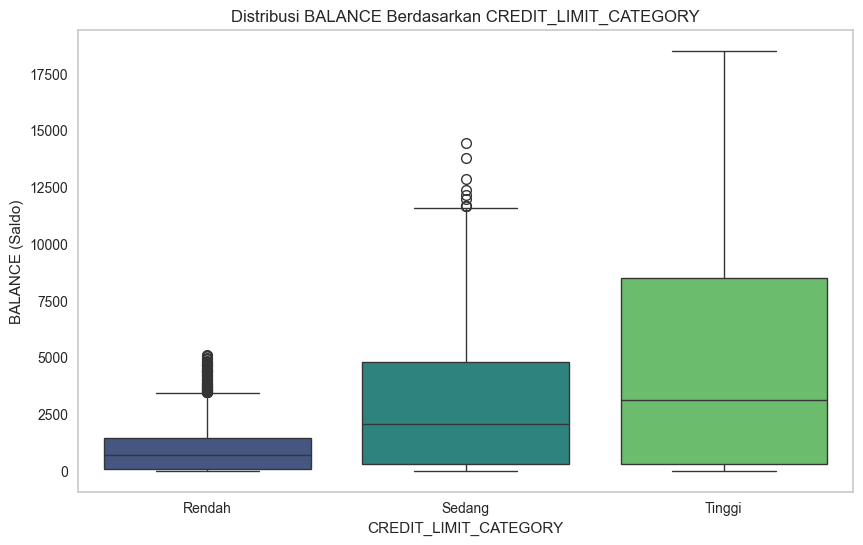

In [13]:
# Membuat bar plot untuk melihat rata-rata BALANCE pada setiap kategori CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='CREDIT_LIMIT_CATEGORY', y='BALANCE', ci=None, palette='viridis')
plt.title("Rata-rata BALANCE Berdasarkan CREDIT_LIMIT_CATEGORY")
plt.xlabel("CREDIT_LIMIT_CATEGORY")
plt.ylabel("BALANCE (Saldo)")
plt.grid(axis='y')
plt.show()

# Membuat box plot untuk melihat distribusi BALANCE pada setiap kategori CREDIT_LIMIT
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CREDIT_LIMIT_CATEGORY', y='BALANCE', palette='viridis')
plt.title("Distribusi BALANCE Berdasarkan CREDIT_LIMIT_CATEGORY")
plt.xlabel("CREDIT_LIMIT_CATEGORY")
plt.ylabel("BALANCE (Saldo)")
plt.grid(axis='y')
plt.show()

Dari visualisasi di atas, terlihat bahwa nasabah dengan kategori `CREDIT_LIMIT` yang lebih tinggi cenderung memiliki saldo `BALANCE` yang lebih besar dibandingkan dengan nasabah pada kategori limit kredit rendah. Rata-rata saldo di kategori Rendah jauh lebih kecil dibandingkan dengan kategori Sedang dan Tinggi, menunjukkan adanya korelasi positif antara batas kredit dan saldo nasabah. 

Selain itu, visualisasi box plot menunjukkan variasi distribusi saldo yang berbeda di setiap kategori. Kategori Rendah memiliki rentang saldo yang sempit dengan beberapa outlier, sementara kategori Sedang dan Tinggi memiliki rentang saldo yang lebih luas, menandakan adanya variasi perilaku nasabah. Pada kategori Tinggi, saldo nasabah lebih stabil dan konsisten tanpa banyak outlier, sedangkan kategori Sedang memperlihatkan banyak outlier yang mencerminkan nasabah dengan saldo tinggi. Hal ini menunjukkan bahwa nasabah dengan limit kredit tinggi cenderung memanfaatkan fasilitas kredit lebih baik dan memiliki saldo yang stabil. 

Nantinya tim finance dapat memanfaatkan informasi ini untuk fokus pada nasabah dengan limit kredit sedang yang memiliki saldo tinggi sebagai target peningkatan limit kredit, guna meningkatkan loyalitas dan penggunaan produk perbankan secara optimal.

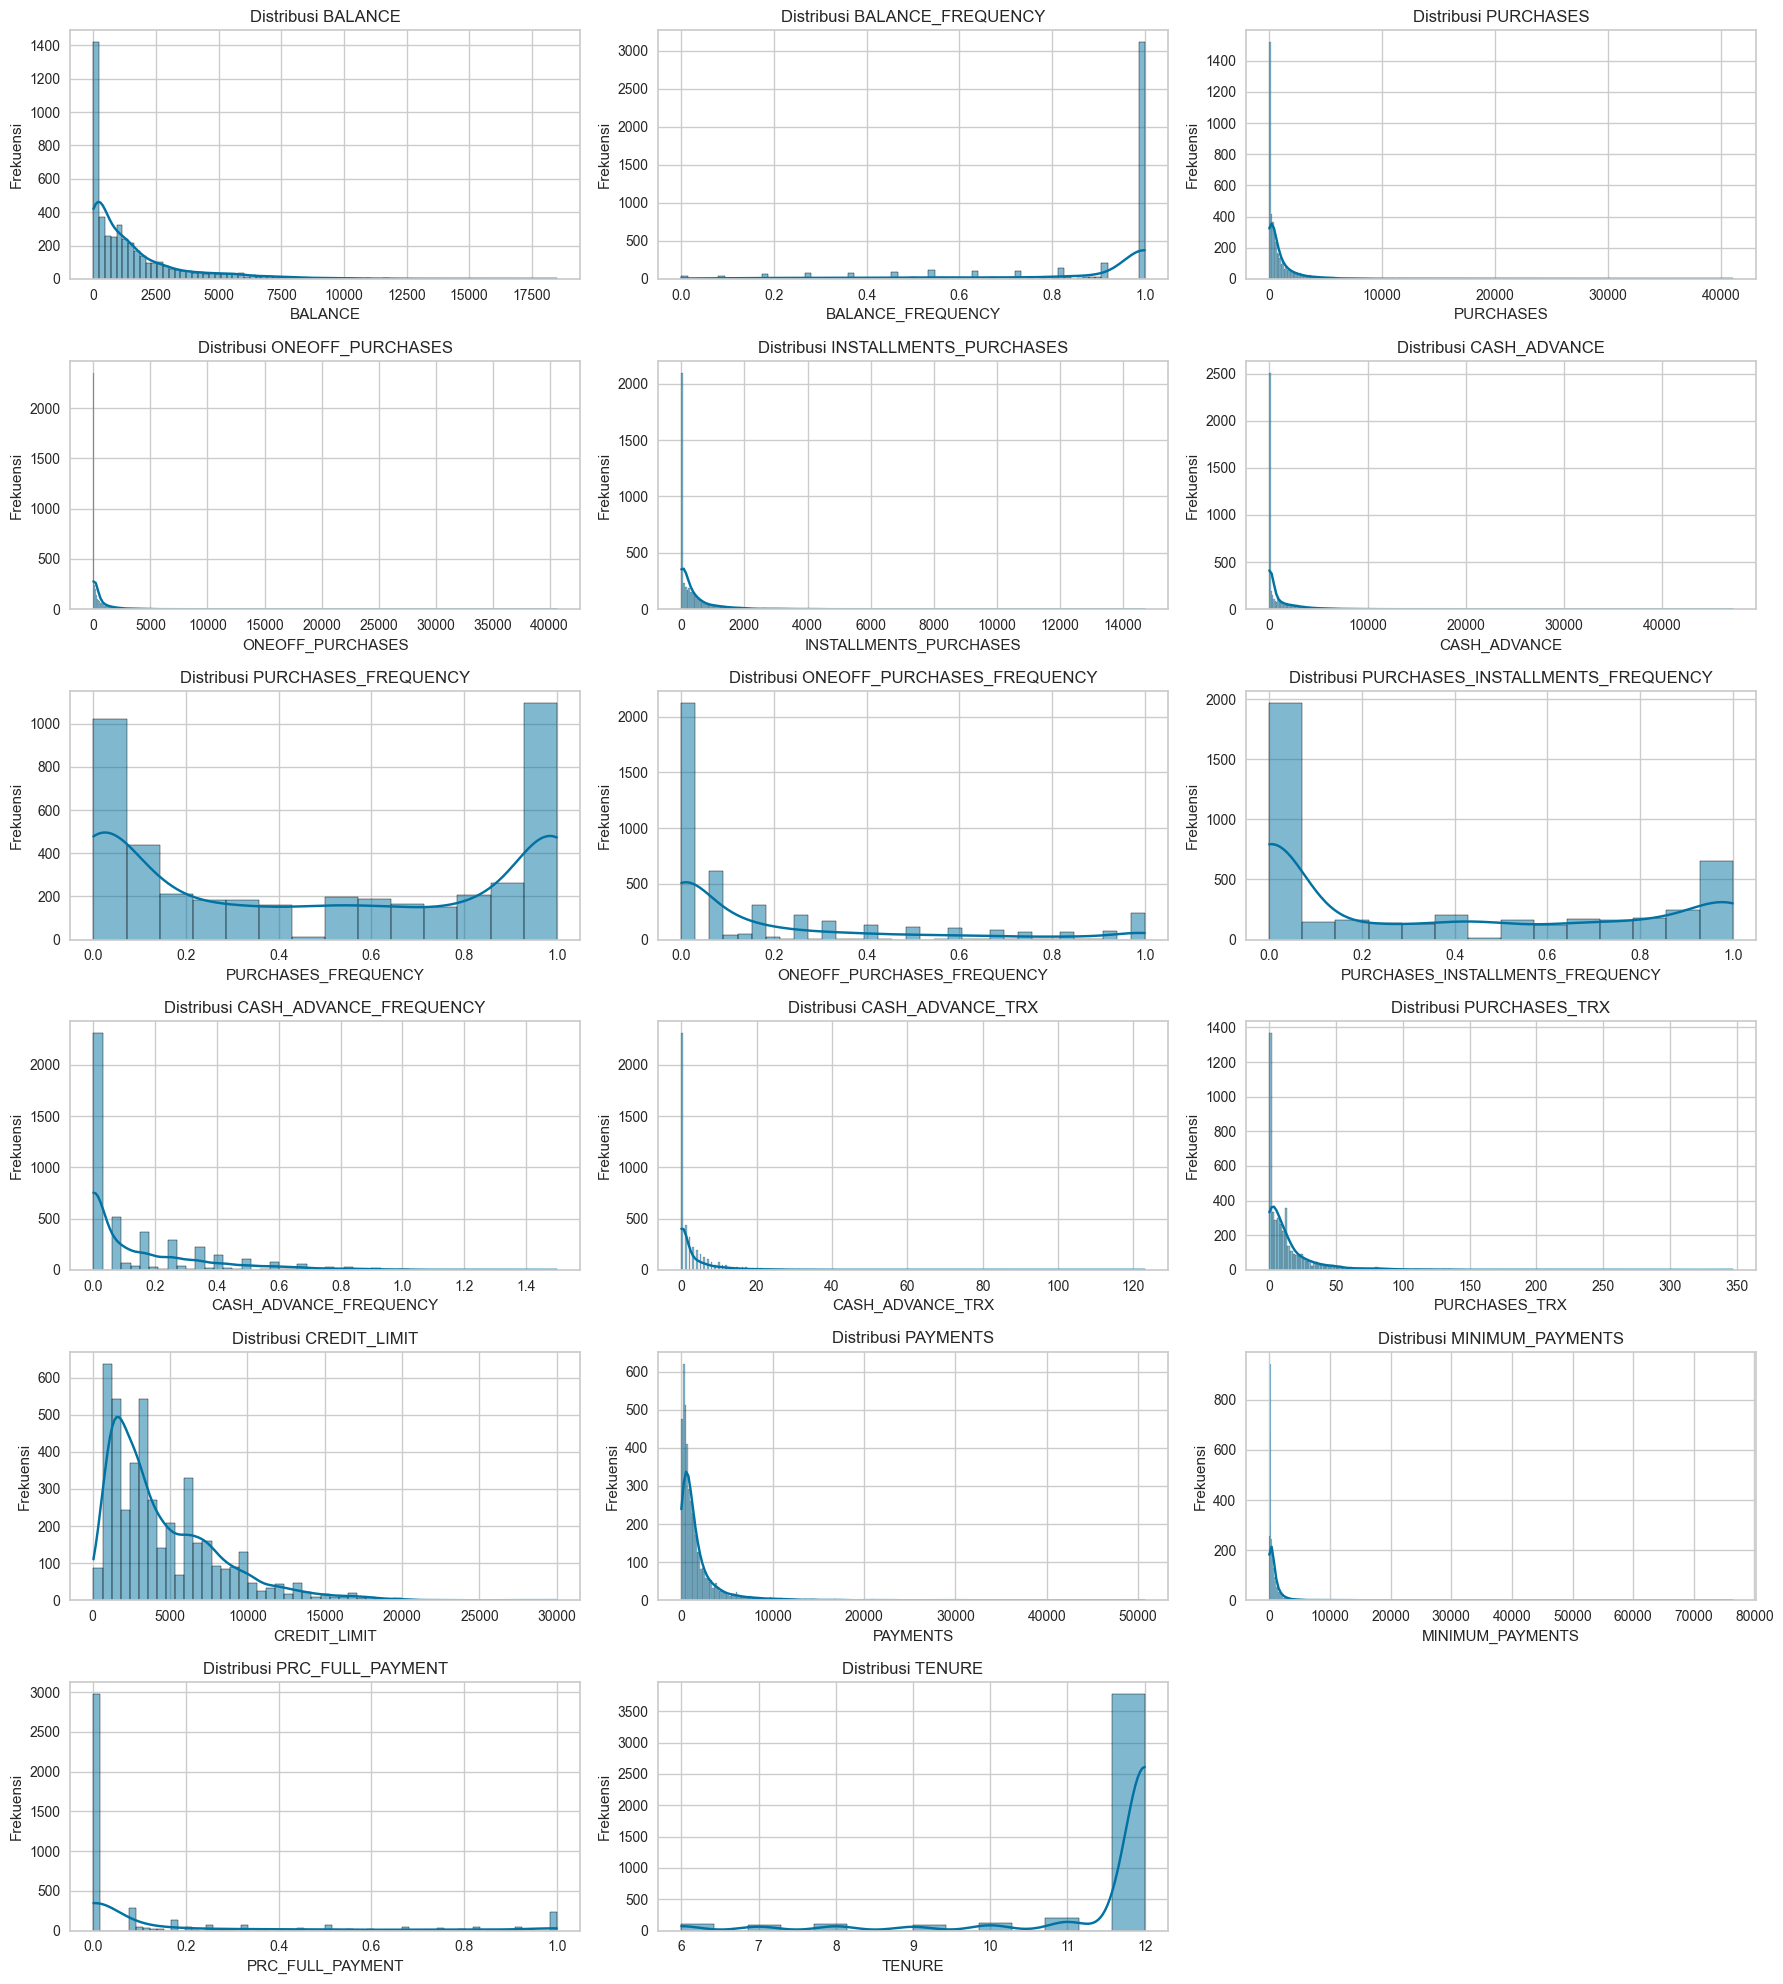

In [14]:
# Daftar kolom numerik yang akan dianalisis
numeric_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Membuat figure dan axes
num_plots = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(18, 20))

# Flatten axes array untuk iterasi yang lebih mudah
axes = axes.flatten()

# Plot histogram dengan KDE untuk setiap kolom numerik
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekuensi")

# Menghilangkan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menampilkan plot
plt.tight_layout()
plt.show()

* Hasil visualisasi menunjukan bahwa sebagian besar fitur numerik seperti `BALANCE, PURCHASES, CASH_ADVANCE, PAYMENTS, dan MINIMUM_PAYMENTS` memiliki distribusi yang skewed ke kanan, dengan mayoritas nilai berada pada rentang rendah. Hal ini menunjukkan adanya outlier yang mencerminkan nasabah dengan transaksi atau saldo sangat besar. 

* Fitur-fitur terkait frekuensi seperti `PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY` menunjukkan dua kelompok nasabah: mereka yang jarang bertransaksi dan yang sering bertransaksi. Pada kolom `CREDIT_LIMIT`, terlihat bahwa mayoritas nasabah memiliki limit kredit dalam kategori rendah hingga sedang, sementara kolom `PRC_FULL_PAYMENT` mengindikasikan bahwa sebagian besar nasabah jarang melakukan pembayaran penuh. 

* Distribusi `TENURE` yang mendekati nilai maksimum menunjukkan bahwa banyak nasabah telah lama menggunakan layanan kartu kredit. Secara keseluruhan, analisis ini mengungkap variasi perilaku nasabah, di mana mayoritas berada pada segmen transaksi rendah, tetapi terdapat juga nasabah dengan aktivitas transaksi tinggi.

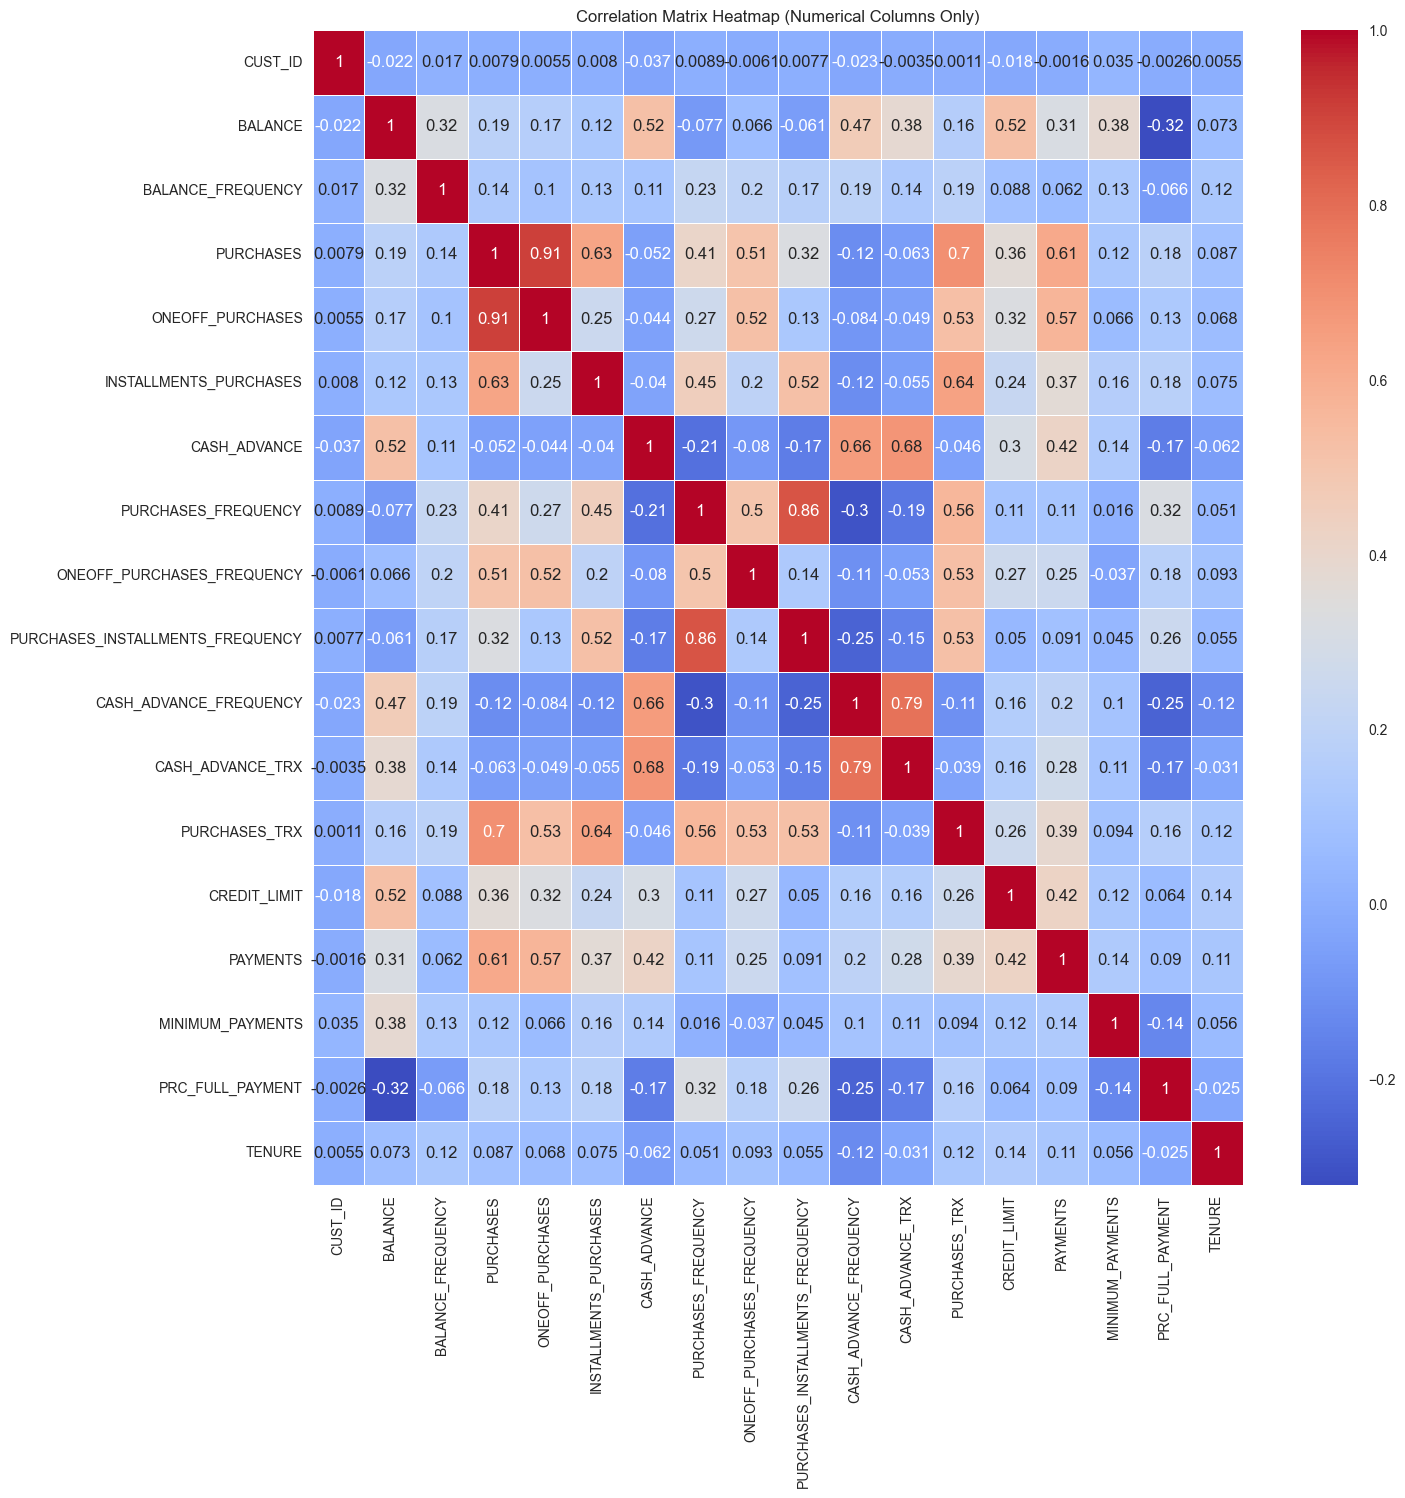

In [15]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Numerical Columns Only)")
plt.show()

#### Korelasi Tinggi:
* ONEOFF_PURCHASES VS PURCHASES: Korelasi sangat tinggi (0.91), menunjukkan bahwa pembelian sekali bayar berkontribusi besar terhadap total pembelian.

* CASH_ADVANCE_TRX VS CASH_ADVANCE_FREQUENCY: Korelasi kuat (0.79), mengindikasikan bahwa semakin sering nasabah melakukan cash advance, semakin tinggi jumlah transaksi cash advance yang terjadi.

* MINIMUM_PAYMENTS VS BALANCE: Korelasi moderat (0.38), menandakan bahwa nasabah dengan saldo tinggi cenderung membayar minimum lebih besar.
#### Korelasi dengan CREDIT_LIMIT:
* CREDIT_LIMIT VS BALANCE: Korelasi positif (0.52), menunjukkan bahwa nasabah dengan limit kredit lebih tinggi biasanya memiliki saldo yang lebih besar.

* CREDIT_LIMIT VS PAYMENTS: Korelasi positif (0.26), menandakan nasabah dengan limit kredit lebih tinggi cenderung melakukan pembayaran yang lebih besar.

#### Korelasi dengan PURCHASES_TRX:
* PURCHASES_TRX VS PURCHASES: Korelasi tinggi (0.7), artinya semakin banyak transaksi pembelian, semakin tinggi total pembelian nasabah.

# **VI. Feature Engineering**

In [16]:
# Hanya digunakan kolom numerical
X = df.drop(['CREDIT_LIMIT_CATEGORY'], axis = 1)

print(X.shape)

(4475, 18)


## Handling Missing Values

In [17]:
X.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 155 missing value pada column MINIMUM_PAYMENTS

In [18]:
# Filter data di mana MINIMUM_PAYMENTS adalah NaN
X_missing_min_payments = X[X['MINIMUM_PAYMENTS'].isna()]

# Tampilkan statistik deskriptif untuk INSTALLMENTS_PURCHASES dan CASH_ADVANCE
print("Statistik Deskriptif (MINIMUM_PAYMENTS = NaN):")
print(X_missing_min_payments[['INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']].describe())

Statistik Deskriptif (MINIMUM_PAYMENTS = NaN):
       INSTALLMENTS_PURCHASES  CASH_ADVANCE
count              155.000000    155.000000
mean               136.993484    508.386970
std                282.129396   1172.157964
min                  0.000000      0.000000
25%                  0.000000      0.000000
50%                  0.000000      0.000000
75%                154.415000    412.694209
max               1990.810000   7616.064965


Berdasarkan evaluasi tipe missing data pada kolom `MINIMUM_PAYMENTS`, hilangnya data lebih tepat dikategorikan sebagai MNAR (Missing Not at Random). Hal ini disebabkan oleh pola yang menunjukkan bahwa nasabah yang tidak mencatat pembayaran minimum umumnya tidak melakukan pembelian cicilan `INSTALLMENTS_PURCHASES` rendah dan sering menggunakan cash advance. Meskipun ada indikasi bahwa beberapa missing value bisa diprediksi menggunakan fitur lain seperti INSTALLMENTS_PURCHASES dan CASH_ADVANCE, hilangnya data ini lebih disebabkan oleh keputusan nasabah yang memilih untuk tidak melakukan pembayaran minimum, bukan karena alasan acak.

In [19]:
X.fillna(0, inplace=True)

Karena hal ini saya akan isi missing value dengan 0 karena MNAR

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

bisa dilihat data missing sudah tidak ada

## Handling Outlier

In [21]:
# Check distribusi data untuk kolom numerikal saja
num_cols = X.columns
skewness = []

for col in num_cols:
    skew_val = round(X[col].skew(), 1)
    skewness.append([col, skew_val, 'normal' if abs(skew_val) <= 0.5 else 'skewed'])

# Membuat dataframe dengan kolom yang benar
skewness = pd.DataFrame(skewness, columns=['Column', 'Skewness', 'Distribution'])
skewness

,Column,Skewness,Distribution
0,CUST_ID,0.0,normal
1,BALANCE,2.3,skewed
2,BALANCE_FREQUENCY,-2.0,skewed
3,PURCHASES,7.1,skewed
4,ONEOFF_PURCHASES,10.0,skewed
5,INSTALLMENTS_PURCHASES,6.3,skewed
6,CASH_ADVANCE,5.6,skewed
7,PURCHASES_FREQUENCY,0.1,normal
8,ONEOFF_PURCHASES_FREQUENCY,1.5,skewed
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.5,normal


In [22]:
# Mendapatkan kolom numerik dari X
num_train = X._get_numeric_data()

for k, v in num_train.items():
    # Cek skewness untuk menentukan metode yang digunakan
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Distribusi normal -> hitung Z-score manual
        mean = v.mean()
        std = v.std()
        threshold = 3  # Threshold untuk outlier Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Batas bawah dan atas berdasarkan Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Distribusi tidak normal -> gunakan IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Batas bawah dan atas berdasarkan IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase outlier
    perc = (len(v_outliers) / len(v)) * 100

    # Tampilkan hasil
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")

Column CUST_ID - Lower bound: -3276.793, Upper bound: 12226.793, Outliers = 0.00%
Column BALANCE - Lower bound: -2760.274, Upper bound: 4932.278, Outliers = 8.02%
Column BALANCE_FREQUENCY - Lower bound: 0.722, Upper bound: 1.167, Outliers = 16.72%
Column PURCHASES - Lower bound: -1554.73, Upper bound: 2696.71, Outliers = 9.47%
Column ONEOFF_PURCHASES - Lower bound: -862.83, Upper bound: 1438.05, Outliers = 11.69%
Column INSTALLMENTS_PURCHASES - Lower bound: -683.828, Upper bound: 1139.712, Outliers = 9.88%
Column CASH_ADVANCE - Lower bound: -1708.332, Upper bound: 2847.219, Outliers = 11.26%
Column PURCHASES_FREQUENCY - Lower bound: -0.718, Upper bound: 1.699, Outliers = 0.00%
Column ONEOFF_PURCHASES_FREQUENCY - Lower bound: -0.375, Upper bound: 0.625, Outliers = 12.45%
Column PURCHASES_INSTALLMENTS_FREQUENCY - Lower bound: -0.829, Upper bound: 1.557, Outliers = 0.00%
Column CASH_ADVANCE_FREQUENCY - Lower bound: -0.375, Upper bound: 0.625, Outliers = 3.84%
Column CASH_ADVANCE_TRX - Low

BIsa terlihat jumlah persentase outlier dari masing-masing column

In [23]:
# Winsorizer untuk column (Skew)
winsorizer = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY',
                                             'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
winsorizer.fit(X)
X = winsorizer.transform(X)

Selanjutnya akan saya capping menggunakan winsorizer

In [24]:
# Mendapatkan kolom numerik dari X
num_train = X._get_numeric_data()

for k, v in num_train.items():
    # Cek skewness untuk menentukan metode yang digunakan
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Distribusi normal -> hitung Z-score manual
        mean = v.mean()
        std = v.std()
        threshold = 3  # Threshold untuk outlier Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Batas bawah dan atas berdasarkan Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Distribusi tidak normal -> gunakan IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Batas bawah dan atas berdasarkan IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase outlier
    perc = (len(v_outliers) / len(v)) * 100

    # Tampilkan hasil
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")

Column CUST_ID - Lower bound: -3276.793, Upper bound: 12226.793, Outliers = 0.00%
Column BALANCE - Lower bound: -2760.274, Upper bound: 4932.278, Outliers = 0.00%
Column BALANCE_FREQUENCY - Lower bound: 0.722, Upper bound: 1.167, Outliers = 0.00%
Column PURCHASES - Lower bound: -1554.73, Upper bound: 2696.71, Outliers = 0.00%
Column ONEOFF_PURCHASES - Lower bound: -862.83, Upper bound: 1438.05, Outliers = 0.00%
Column INSTALLMENTS_PURCHASES - Lower bound: -683.828, Upper bound: 1139.712, Outliers = 0.00%
Column CASH_ADVANCE - Lower bound: -1708.332, Upper bound: 2847.219, Outliers = 0.00%
Column PURCHASES_FREQUENCY - Lower bound: -0.718, Upper bound: 1.699, Outliers = 0.00%
Column ONEOFF_PURCHASES_FREQUENCY - Lower bound: -0.375, Upper bound: 0.625, Outliers = 0.00%
Column PURCHASES_INSTALLMENTS_FREQUENCY - Lower bound: -0.829, Upper bound: 1.557, Outliers = 0.00%
Column CASH_ADVANCE_FREQUENCY - Lower bound: -0.375, Upper bound: 0.625, Outliers = 0.00%
Column CASH_ADVANCE_TRX - Lower b

Outlier sudah hilang dan dihandle dengan baik menggunakan winsorizer

## Feature Selection

interval columns not set, guessing: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


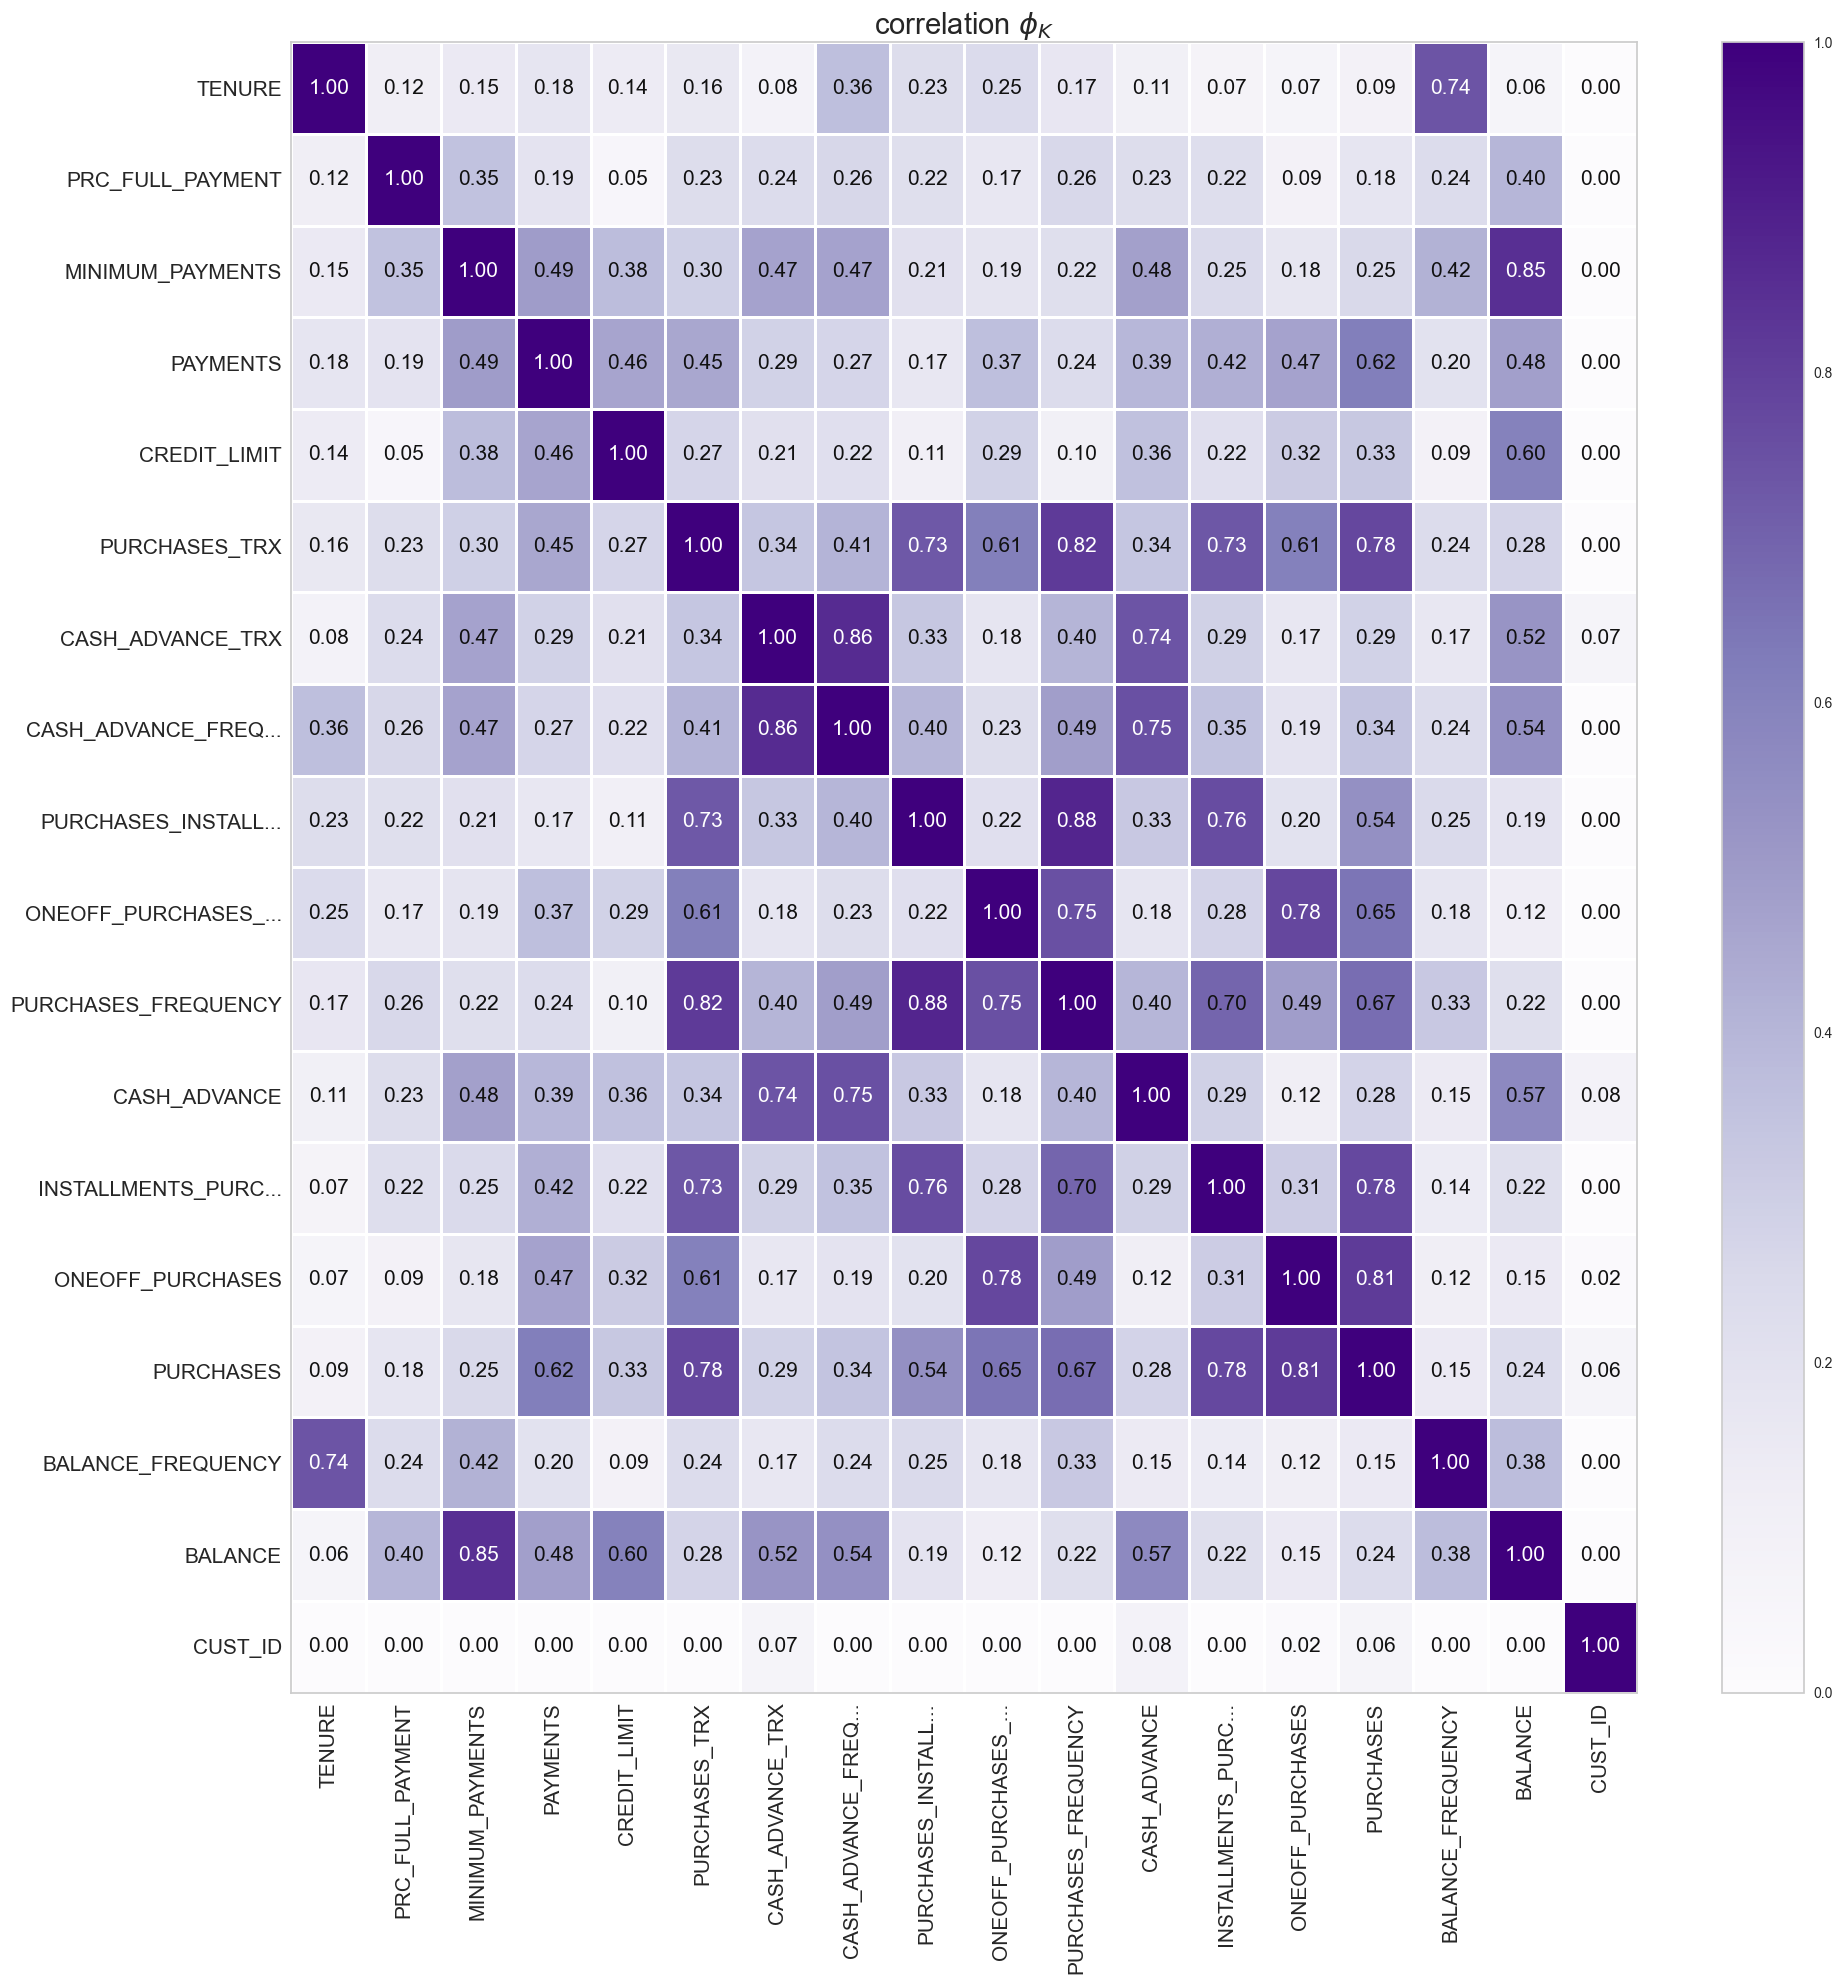

In [25]:
# Create function to correlate variables with default
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Define the list of columns for each subset
columns = X.columns

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(X, columns)

plot_correlation_matrix(correlation.values, x_labels=correlation.columns, y_labels=correlation.index, 
                        vmin=0, vmax=1, color_map='Purples', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

Berdasarkan referensi {Molina, G., Albert, P., & McKenzie, J. (2006).** *The Nature of Discrete and Continuous Data in Behavioral Research.* Journal of Behavioral Research, 22(4), 569–580.}

Saya mengelompokan column menjadi 2:
1. **Diskrit:**
   - `CUST_ID`: ID pelanggan (identitas tidak bisa dipecah dan merupakan bilangan bulat).
   - `CASH_ADVANCE_TRX`: Jumlah transaksi tunai, variabel diskrit karena merupakan jumlah kejadian.
   - `PURCHASES_TRX`: Jumlah transaksi pembelian, variabel diskrit karena merupakan jumlah kejadian.
   - `TENURE`: Lama penggunaan kartu dalam bulan atau tahun, merupakan nilai bilangan bulat dan diskrit.

2. **Kontinu:**
   - `BALANCE`: Saldo yang dapat mencakup desimal dan memiliki rentang nilai kontinu.
   - `BALANCE_FREQUENCY`: Skor frekuensi pembaruan saldo antara 0 dan 1, berupa desimal dan kontinu.
   - `PURCHASES`: Jumlah total pembelian yang bisa memiliki nilai desimal.
   - `ONEOFF_PURCHASES`: Jumlah pembelian satu kali, bersifat kontinu karena bisa mengandung desimal.
   - `INSTALLMENTS_PURCHASES`: Jumlah pembelian dengan cicilan, bersifat kontinu.
   - `CASH_ADVANCE`: Uang tunai yang diambil, bisa berupa desimal dan bersifat kontinu.
   - `PURCHASES_FREQUENCY`: Frekuensi pembelian dalam rentang 0 hingga 1, berupa desimal dan kontinu.
   - `ONEOFF_PURCHASES_FREQUENCY`: Frekuensi pembelian satu kali dalam rentang 0 hingga 1, berupa desimal dan kontinu.
   - `PURCHASES_INSTALLMENTS_FREQUENCY`: Frekuensi pembelian cicilan dalam rentang 0 hingga 1, berupa desimal dan kontinu.
   - `CASH_ADVANCE_FREQUENCY`: Frekuensi penarikan tunai dalam rentang 0 hingga 1, berupa desimal dan kontinu.
   - `CREDIT_LIMIT`: Limit kredit yang diberikan kepada pengguna, berupa nilai kontinu karena mencakup desimal.
   - `PAYMENTS`: Jumlah total pembayaran yang dapat mencakup desimal.
   - `MINIMUM_PAYMENTS`: Jumlah pembayaran minimum, berupa nilai desimal dan kontinu.
   - `PRC_FULL_PAYMENT`: Persentase pembayaran penuh, berupa proporsi antara 0 dan 1, kontinu.

Saya juga menemukan pada phik corelation di atas, bahwa ` TENURE` memiliki korelasi yang relatif rendah dengan fitur lainnya, sehingga kurang memberikan informasi dalam analisis clustering. Selanjutnya `CUST_ID` adalah kolom identifikasi nasabah, sehingga tidak relevan untuk digunakan dalam clustering. Saya juga akan membuang `CASH_ADVANCE_TRX` dan `PURCHASES_TRX` karena ini merupakan jumlah transaksi tunai, yang merupakan variabel diskrit karena merupakan jumlah kejadian.

Menurut https://www.andrews.edu:
- Kolerasi `0.7` - `0.9` merupakan **highly colerated**
- Kolerasi `0.5` - `0.7` merupakan **moderately colerated**
- Kolerasi `0.3` - `0.5` merupakan **low colerated**

Column-column: `'INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', dan 'MINIMUM_PAYMENTS'` juga akan saya buang karena memiliki nilai multicolinearity yang tinggi (>0.7) dengan column lain, yang dapat dilihat pada visualisasi phik

In [26]:
X.drop(['TENURE','CUST_ID','CASH_ADVANCE_TRX','PURCHASES_TRX','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','MINIMUM_PAYMENTS'], axis = 1, inplace = True)

Seluruh column yang sudah di jelaskan telah di drop

## Scaling

In [27]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Karena saya telah melakukan winsorization (penanganan outlier) dan data memiliki fitur dengan berbagai rentang yang berbeda maka saya putuskan untuk memakai scaling MinMaxScaler(). Selain hal itu saya juga ingin mempertahankan distribusi data asli dan algoritma clustering seperti K-Means bekerja lebih baik dengan data yang berada pada rentang yang sama (0-1).

## PCA

In [28]:
pca = PCA()
pca.fit(X_scaled)

PCA()

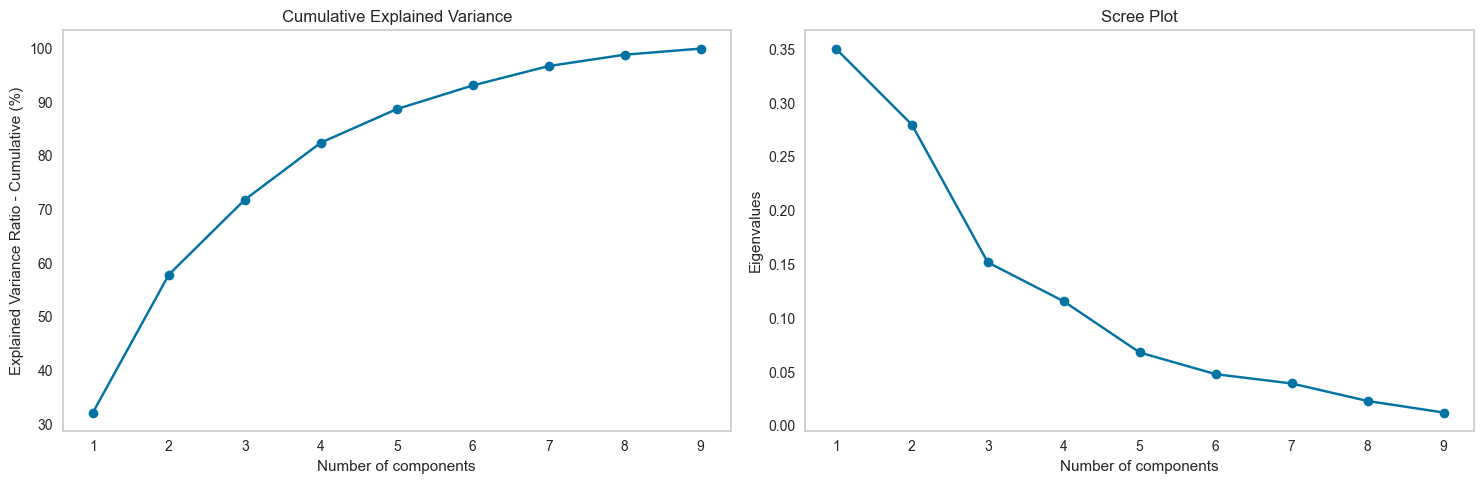

In [29]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))

# Plot Cumulative Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative (%)')
plt.title('Cumulative Explained Variance')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), 
         pca.explained_variance_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')

plt.tight_layout()
plt.show()

In [30]:
# Cumulative Explained Variance Analysis 75 %
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.75) + 1
num_features

np.int64(4)

Dari visualisasi diatas dan hasil Cumulative Explained Variance Analysis, menunjukkan bahwa dengan memilih 4 komponen utama, kita sudah mampu mempertahankan sekitar 75% varians dari data asli. Ini berarti sebagian besar informasi dalam dataset dapat dijelaskan dengan menggunakan hanya 4 komponen, sehingga memungkinkan pengurangan dimensi tanpa kehilangan banyak informasi. 

Visualisasi Scree Plot juga menunjukkan titik "elbow" di sekitar komponen ke-4, di mana setelah itu nilai eigen menurun secara perlahan. Ini mengindikasikan bahwa menambah lebih dari 4 komponen tidak akan memberikan peningkatan yang signifikan dalam penjelasan varians, sehingga pemilihan n_components = 4 merupakan keputusan yang efisien untuk analisis lebih lanjut.

In [31]:
# Let's train the model with reducing to 4 component
pca = PCA(n_components=4)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

# **VII. Model Definition**

K-Means adalah pilihan yang tepat untuk segmentasi nasabah kartu kredit dalam kasus ini karena kesederhanaannya, kemampuannya menangani data numerik berukuran besar, dan efisiensinya dalam menemukan kelompok nasabah yang memiliki karakteristik serupa. Dengan menggunakan hyperparameter yang tepat dan metrik evaluasi yang sesuai, saya dapat memastikan bahwa model clustering yang dibangun memberikan hasil yang optimal untuk analisis lebih lanjut dan penerapan strategi bisnis.

Selain itu nantinya untuk Hyperparameter tuning, saya akan gunakan Elbow method dan Silhouette Score untuk menilai berapa n_clusters terbaik.

# **VIII. Model Training**

## Elbow Method

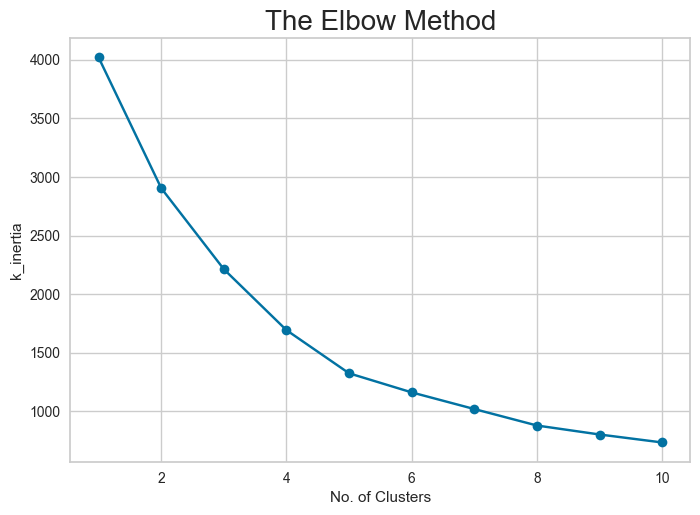

In [32]:
k_inertia = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 69)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(1, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Berdasarkan grafik Elbow Method, terdapat indikasi bahwa titik optimal untuk jumlah cluster berada di sekitar `k = 3 atau k = 4`, di mana penurunan inertia mulai melandai. Artinya, setelah titik ini, penambahan jumlah cluster tidak memberikan perbaikan yang signifikan dalam mengurangi inertia. Untuk memastikan pilihan yang lebih tepat, langkah selanjutnya adalah mengevaluasi menggunakan Silhouette Score untuk melihat mana yang menghasilkan kualitas clustering yang lebih baik dan konsisten.

## Silhouette Score

In [33]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.28539998705654235
For n_clusters = 3 The average silhouette_score is : 0.3179073155826846
For n_clusters = 4 The average silhouette_score is : 0.33215348949373247
For n_clusters = 5 The average silhouette_score is : 0.36335640875501996


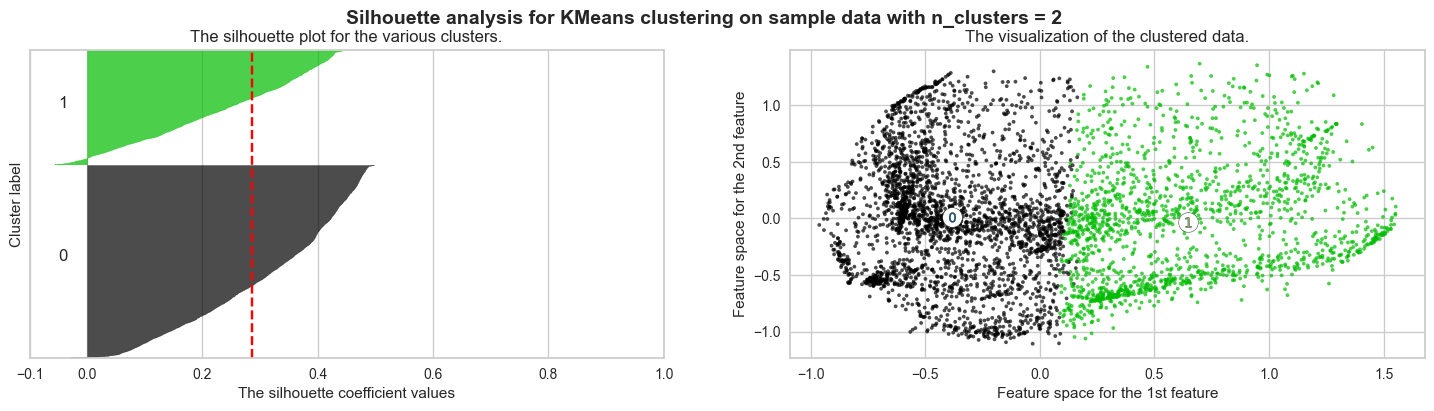

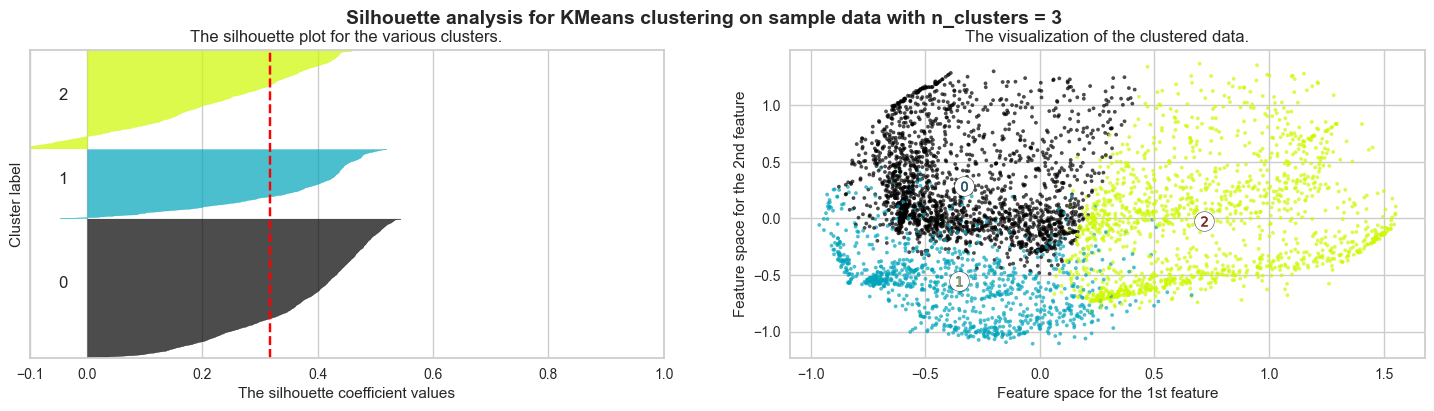

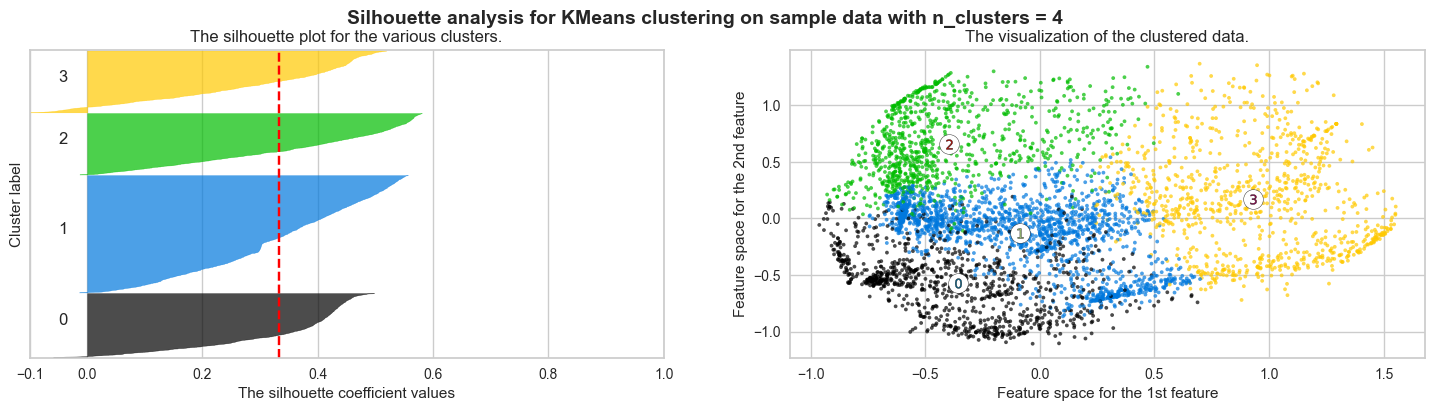

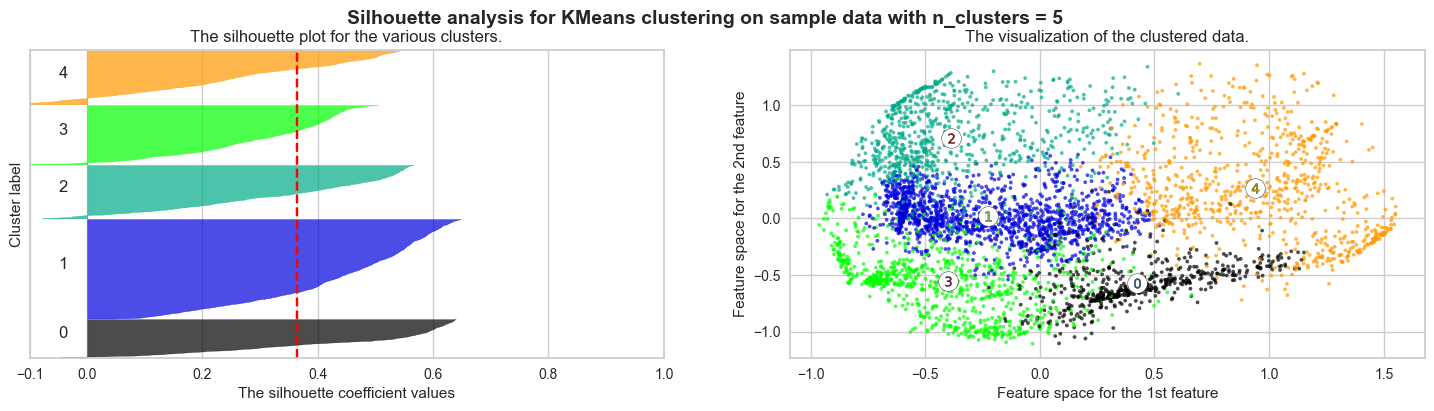

In [34]:
# Melakukan display the Silhouette Score dan Plot Silhouette Plot
plot_silhouette(range(2, 6), X_scaled_pca, 7)

Menurut artikel dari (https://www.linkedin.com/advice/0/how-can-you-calculate-silhouette-score-clustering-algorithm-w9bcc#:~:text=A%20general%20rule%20of%20thumb,0.5%20indicates%20a%20fair%20clustering.)

* silhouette score `> 0.5` indicates a `good clustering`

* silhouette score `< 0.25` indicates a `bad clustering`

* silhouette score `0.25 - 0.5` indicates a `fair clustering`.

## Silhouette Score (Yellow Brick)

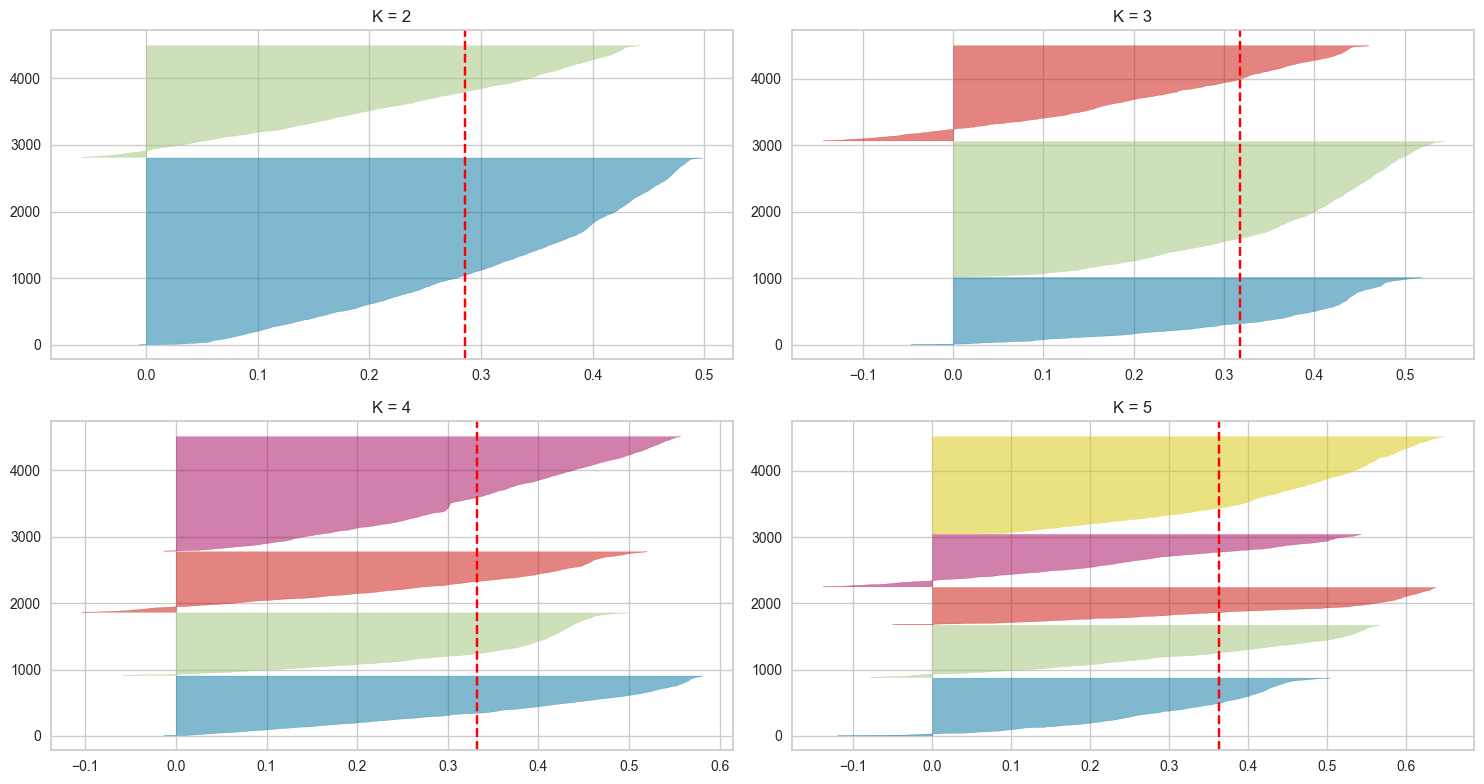

In [35]:
#Silhoutte Plot Analysis
# Set up subplots
#diatur mau dicoba berapa cluster disini
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 10, max_iter = 100, random_state = 69)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(X_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Meskipun silhouette score tertinggi didapatkan pada K = 5, saya menilai bahwa segmentasi dengan K = 4 lebih baik dalam menangkap variasi data dan memberikan definisi yang lebih jelas pada kelompok nasabah. Oleh karena itu, saya memilih K = 4 sebagai jumlah cluster yang optimal, karena memberikan keseimbangan yang lebih baik antara kualitas segmentasi dan kemampuan dalam mengidentifikasi karakteristik nasabah yang berbeda. Selain itu, jumlah overlap antar cluster juga lebih sedikit pada K = 4, sehingga menghasilkan segmentasi yang lebih terpisah dan jelas.

## Final Clusters (K = 4)

In [36]:
km = KMeans(n_clusters = 4, random_state = 69)
km.fit(X_scaled_pca)

KMeans(n_clusters=4, random_state=69)

# **IX. Model Evaluation**

In [37]:
pred = km.predict(X_scaled_pca)
pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [38]:
# Iterasi keberapa dia konvergen
km.n_iter_

11

Hasil `km.n_iter_ = 11` menunjukkan bahwa K-Means hanya butuh 11 kali iterasi untuk mencapai konvergensi, jauh di bawah batas maksimal (300 iterasi). Artinya, algoritma ini bekerja efisien dalam menentukan posisi centroid. Dengan iterasi yang sedikit, data yang digunakan terlihat cukup mudah untuk dikelompokkan, sehingga K-Means bisa mencapai hasil yang optimal tanpa banyak perulangan.

In [39]:
# Memasukan hasil clustering kedalam original dataset
df_kmeans = df.copy()
df_kmeans['cluster'] = pred
df_kmeans = df_kmeans.drop(['CREDIT_LIMIT_CATEGORY'], axis = 1)
df_kmeans

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8,0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8,0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2


## EDA After Clustering

### Visualisasi Hasil Cluster

<Axes: >

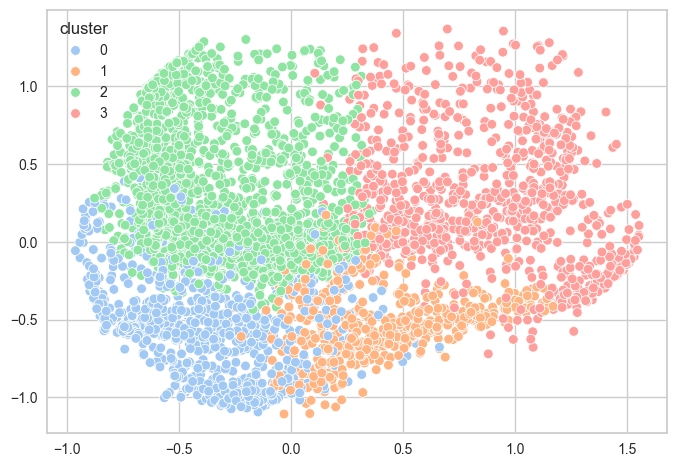

In [40]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='pastel')

Dari hasil visualisasi clustering menggunakan PCA dua dimensi (PC1 dan PC2) dengan empat cluster (biru, hijau, oranye, dan merah), saya melihat bahwa data terbagi dengan cukup baik ke dalam empat kelompok yang jelas. Meskipun ada sedikit overlap antar cluster, terutama antara oranye dan hijau, keseluruhan pola menunjukkan bahwa algoritma K-Means mampu memisahkan data berdasarkan fitur yang signifikan. Ini mengindikasikan adanya empat segmen nasabah dengan karakteristik yang berbeda, yang bisa menjadi dasar untuk strategi pemasaran yang lebih terarah. Selanjutnya, saya akan melakukan analisis lebih lanjut untuk menggali karakteristik unik dari masing-masing cluster dan memberikan rekomendasi spesifik bagi setiap segmen.

In [41]:
df_kmeans['cluster'].value_counts()

cluster
2    2067
0     919
3     881
1     608
Name: count, dtype: int64

Cluster 2 memiliki jumlah nasabah terbanyak dengan 2.076 orang, diikuti oleh cluster 0 sebanyak 919 orang, dan cluster 1 sebagai yang terkecil dengan 608 orang. Ini menunjukkan bahwa mayoritas nasabah memiliki karakteristik yang sesuai dengan profil cluster 2, sementara cluster 0 dan 1 mewakili segmen yang lebih kecil.

Text(0.5, 1.0, 'BALANCE vs PURCHASES')

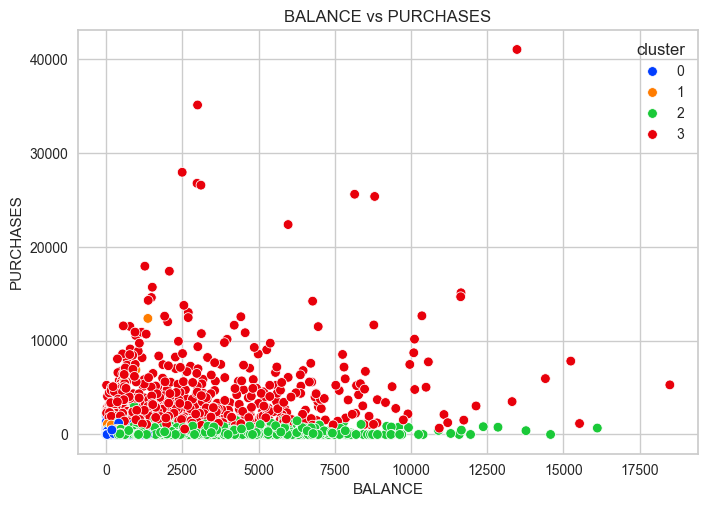

In [42]:
sns.scatterplot(data=df_kmeans, x="BALANCE", y="PURCHASES", hue="cluster",palette="bright")
plt.title("BALANCE vs PURCHASES")

Dari visualisasi hubungan antara BALANCE dan PURCHASES, saya melihat bahwa cluster merah (3) mendominasi di area dengan jumlah pembelian tinggi, menunjukkan bahwa kelompok ini memiliki nasabah dengan aktivitas pembelian yang signifikan. Sementara itu, cluster hijau (2) cenderung berada di area dengan saldo rendah dan aktivitas pembelian minimal. Cluster biru (0) dan oranye (1) memiliki distribusi yang terbatas, menunjukkan adanya kelompok nasabah dengan profil yang lebih spesifik dan rendah aktivitas. Ini mengindikasikan bahwa nasabah di cluster merah memiliki potensi tinggi untuk ditargetkan dalam kampanye promosi produk.

Text(0.5, 1.0, 'ONEOFF_PURCHASES vs CREDIT_LIMIT')

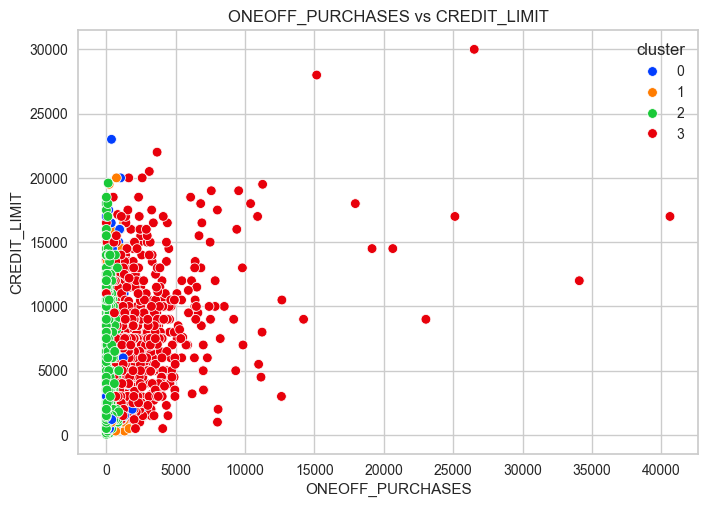

In [43]:
sns.scatterplot(data=df_kmeans, x="ONEOFF_PURCHASES", y="CREDIT_LIMIT", hue="cluster",palette="bright")
plt.title("ONEOFF_PURCHASES vs CREDIT_LIMIT")

Dari visualisasi antara ONEOFF_PURCHASES dan CREDIT_LIMIT, saya melihat bahwa cluster merah (3) memiliki distribusi yang lebih luas dan mencakup nasabah dengan limit kredit serta pembelian sekali bayar (one-off) yang tinggi. Sebaliknya, cluster hijau (2), biru (0), dan oranye (1) terkonsentrasi di area dengan limit kredit rendah hingga sedang dan pembelian sekali bayar yang rendah. Hal ini menunjukkan bahwa nasabah di cluster merah (3) lebih aktif dalam melakukan pembelian besar dan memiliki batas kredit yang lebih tinggi, sehingga cocok untuk penawaran produk premium.

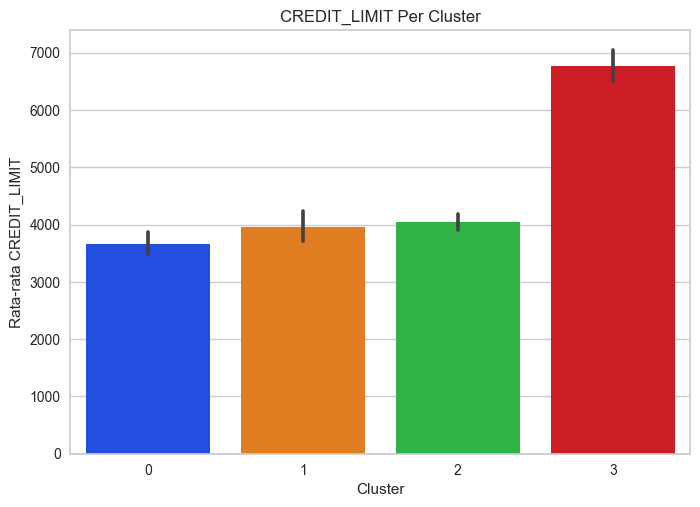

In [44]:
# Membuat barplot CREDIT_LIMIT
sns.barplot(data=df_kmeans, x="cluster", y="CREDIT_LIMIT", palette="bright", estimator=np.mean)
plt.title("CREDIT_LIMIT Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata CREDIT_LIMIT")
plt.show()

Dari visualisasi di atas, saya melihat bahwa cluster merah (3) memiliki rata-rata CREDIT_LIMIT tertinggi dibandingkan cluster lainnya, menunjukkan bahwa nasabah dalam kelompok ini cenderung memiliki limit kredit yang lebih besar. Sebaliknya, cluster biru (0) memiliki rata-rata limit kredit terendah, mengindikasikan segmen nasabah dengan akses kredit yang lebih terbatas. Dari informasi ini bank bisa menawarkan produk premium pada nasabah di cluster merah (3) dan meninjau ulang limit kredit untuk nasabah di cluster biru.

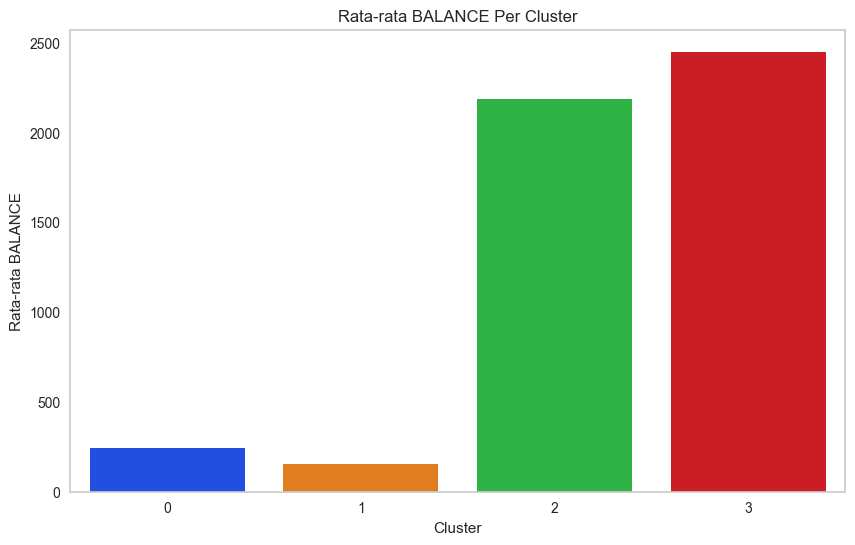

In [45]:
# Membuat barchart rata-rata BALANCE per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df_kmeans, x="cluster", y="BALANCE", palette="bright", ci=None)
plt.title("Rata-rata BALANCE Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata BALANCE")
plt.grid(axis='y')
plt.show()

Dari barchart di atas, terlihat bahwa cluster 3 memiliki rata-rata BALANCE tertinggi, diikuti oleh cluster 2, sedangkan cluster 0 dan 1 memiliki rata-rata BALANCE yang jauh lebih rendah. Hal ini menunjukkan bahwa nasabah pada cluster 3 dan 2 mungkin lebih aktif dalam menggunakan kredit mereka atau memiliki saldo yang lebih besar dibandingkan dengan nasabah di cluster 0 dan 1. Temuan ini dapat digunakan untuk mengidentifikasi segmen nasabah dengan potensi nilai kredit yang lebih tinggi serta merancang strategi pemasaran yang lebih tepat sasaran.

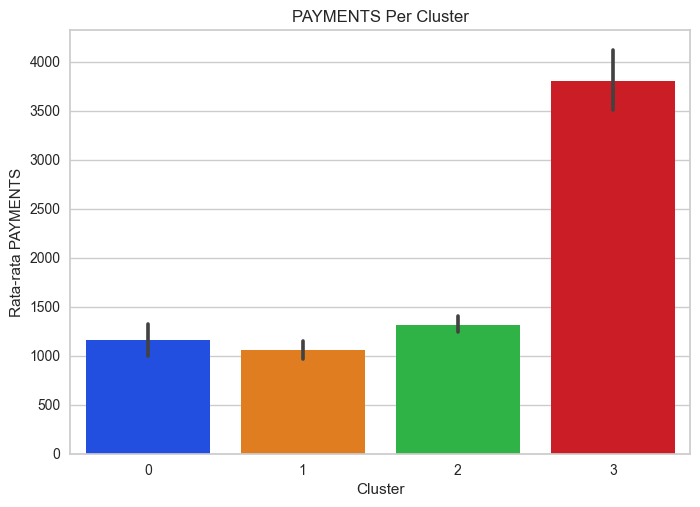

In [46]:
# Membuat barplot
sns.barplot(data=df_kmeans, x="cluster", y="PAYMENTS", palette="bright", estimator=np.mean)
plt.title("PAYMENTS Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Rata-rata PAYMENTS")
plt.show()

Dari grafik di atas, saya melihat bahwa cluster 3 memiliki rata-rata pembayaran (PAYMENTS) tertinggi dibandingkan dengan cluster lainnya, yang mengindikasikan bahwa nasabah di kelompok ini lebih aktif dalam melakukan pembayaran. Sebaliknya, cluster 1 menunjukkan rata-rata pembayaran yang paling rendah, mengisyaratkan adanya potensi nasabah dengan perilaku pembayaran yang kurang aktif. Temuan ini bisa menjadi dasar untuk strategi pemasaran dan pendekatan layanan yang lebih sesuai bagi setiap kelompok.

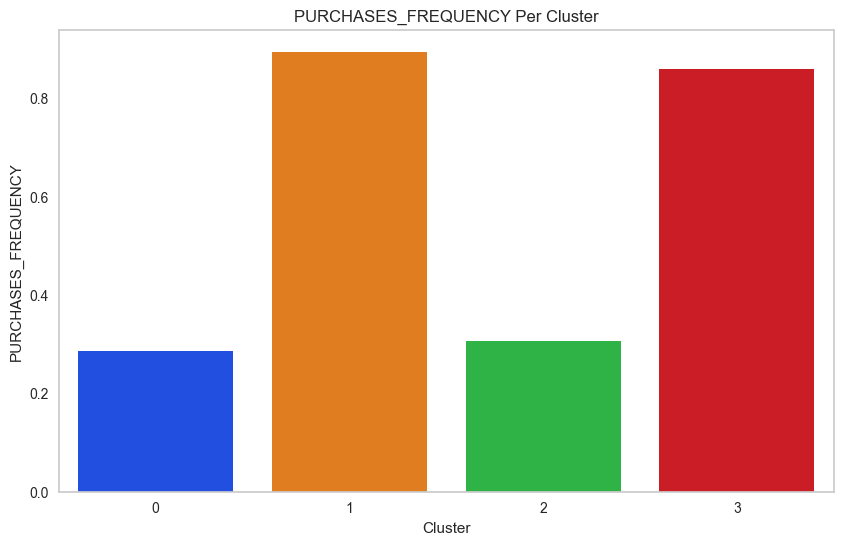

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_kmeans, x="cluster", y="PURCHASES_FREQUENCY", palette="bright", ci=None)
plt.title("PURCHASES_FREQUENCY Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("PURCHASES_FREQUENCY")
plt.grid(axis='y')
plt.show()

Dari grafik di atas, saya mengamati bahwa cluster 1 memiliki frekuensi pembelian (PURCHASES_FREQUENCY) tertinggi, diikuti oleh cluster 3, sementara cluster 0 dan 2 memiliki frekuensi yang jauh lebih rendah. Ini menunjukkan bahwa nasabah di cluster 1 sangat aktif dalam melakukan pembelian, sedangkan nasabah di cluster 0 dan 2 cenderung lebih jarang bertransaksi.

## Tingkat Prioritas Nasabah

1. Cluster 3 (Nasabah Premium)
2. Cluster 2 (Nasabah Regular)
3. Cluster 0 (Nasabah Pasif)
4. Cluster 1 (Nasabah Berisiko)

Akan di jelaskan mengapa seperti ini pada bab `XI.Pengambilan Kesimpulan`

# **X. Model Saving**

In [48]:
num_cols = X.columns.tolist()

In [49]:
#Save Files
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

with open('kmeans.pkl', 'wb') as file_4:
  pickle.dump(km, file_4)

# **XI. Pengambilan Kesimpulan**

### **Kesimpulan EDA Sebelum Clustering**
* Dari hasil eksplorasi data yang telah dilakukan, saya menemukan beberapa wawasan penting yang dapat membantu dalam menentukan strategi pemasaran dan layanan bagi nasabah bank. Sebagian besar nasabah memiliki saldo rendah, dengan beberapa outlier yang menunjukkan nasabah dengan transaksi atau saldo sangat besar. Banyak nasabah juga jarang melakukan pembayaran penuh, dan sebagian besar memiliki batas kredit dalam kategori rendah hingga sedang. Frekuensi transaksi juga bervariasi, dengan sebagian besar nasabah cenderung jarang bertransaksi, tetapi ada juga segmen nasabah yang lebih aktif.

* Korelasi antara beberapa fitur menunjukkan pola yang jelas, seperti pembelian sekali bayar yang berhubungan erat dengan total pembelian, serta saldo yang lebih tinggi biasanya berkorelasi dengan pembayaran yang lebih besar. Nasabah dengan limit kredit tinggi cenderung memiliki saldo yang lebih besar dan melakukan pembayaran lebih sering. Temuan ini memberikan gambaran yang lebih jelas tentang segmen nasabah yang ada, di mana sebagian besar nasabah berada di segmen transaksi rendah, tetapi ada juga kelompok nasabah dengan aktivitas transaksi tinggi yang berpotensi lebih menguntungkan.

### **Kesimpulan Model Evaluation**
* Silhouette Score berkisar antara -1 hingga 1; semakin tinggi nilainya, semakin baik kualitas clustering. Dalam hasil analisis saya, dengan Silhouette Score 0.33 untuk 4 cluster, hal ini menunjukkan bahwa meskipun ada sedikit overlap antar cluster, pembagian kelompok sudah cukup baik dan dapat diinterpretasikan bahwa data berhasil dikelompokkan ke dalam empat segmen nasabah dengan karakteristik yang berbeda. Selain itu hasil km.n_iter_ = 11 juga menunjukan bahwa K-Means hanya butuh 11 kali iterasi untuk mencapai konvergensi. Artinya, algoritma ini bekerja efisien dalam menentukan posisi centroid. Dengan iterasi yang sedikit, data yang digunakan terlihat cukup mudah untuk dikelompokkan, sehingga K-Means bisa mencapai hasil yang optimal tanpa banyak perulangan.

### **Kesimpulan EDA Setelah Clustering**

Berdasarkan hasil analisis clustering menggunakan PCA dan visualisasi yang telah dilakukan, saya dapat menyimpulkan bahwa terdapat empat kelompok nasabah yang berbeda dengan karakteristik unik di setiap cluster.

* Cluster 3, yang saya sebut sebagai `Nasabah Premium`, karena nasabah ini memiliki saldo dan pembayaran tertinggi serta sangat aktif dalam melakukan pembelian besar. `Mereka cocok untuk diprioritaskan dalam kampanye produk premium dan penawaran eksklusif`. 

* Cluster 2, yaitu `Nasabah Standard`, memiliki aktivitas yang lebih reguler, dengan saldo dan pembayaran yang sedang, `serta cocok untuk program loyalitas yang bertujuan meningkatkan keterlibatan`. 

* Cluster 0, saya golongkan sebagai `Nasabah Pasif` karena cenderung memiliki saldo dan frekuensi pembelian yang rendah, serta jarang bertransaksi. Strategi untuk kelompok ini bisa `difokuskan pada edukasi finansial dan insentif untuk meningkatkan penggunaan kartu kredit`. 

* Cluster 1, merupakan `Nasabah Berisiko` karena memiliki frekuensi pembelian yang tinggi namun pembayaran yang rendah, yang menunjukkan adanya potensi risiko gagal bayar. Kelompok ini memerlukan perhatian khusus dari tim manajemen risiko dengan `strategi mitigasi seperti pengingat pembayaran atau penangguhan kredit`.

* Secara keseluruhan, hasil clustering ini memberikan gambaran yang jelas tentang empat segmen nasabah yang ada, masing-masing dengan karakteristik dan kebutuhan yang berbeda. Strategi pemasaran dan pengelolaan nasabah yang lebih terfokus dapat diterapkan untuk mengoptimalkan nilai setiap segmen dan meningkatkan loyalitas nasabah secara efektif.

### **Kelebihan dan Kekurangan Model**
* Kelebihan Model K-Means:

    Model K-Means memiliki efisiensi dan kecepatan yang tinggi, dengan konvergensi tercapai hanya dalam 11 iterasi, menunjukkan bahwa data yang digunakan mudah dikelompokkan tanpa membutuhkan banyak iterasi. Selain itu, dengan pemilihan jumlah cluster yang optimal, yaitu K = 4, model mampu membagi nasabah menjadi empat kelompok yang jelas. Ini memungkinkan segmentasi yang lebih terarah dan cocok untuk strategi pemasaran yang lebih spesifik. Kelebihan lainnya adalah pengurangan overlap antar cluster, yang membuat hasil segmentasi lebih mudah diinterpretasikan dan membantu dalam merancang pendekatan yang lebih tepat untuk setiap kelompok nasabah.

* Kekurangan Model K-Means:

    Namun, K-Means sensitif terhadap pemilihan jumlah cluster (K) yang tepat. Meskipun metode Elbow dan Silhouette digunakan untuk membantu menentukan K, pemilihan yang salah dapat mempengaruhi hasil segmentasi. Selain itu, K-Means mengasumsikan bahwa cluster memiliki bentuk yang seragam, yang bisa kurang efektif jika data memiliki distribusi yang tidak merata atau berbentuk lain, sehingga menyebabkan pemisahan yang kurang akurat. Model ini juga sensitif terhadap outliers, yang dapat mengganggu posisi centroid dan mempengaruhi hasil clustering. Meskipun dalam kasus ini outliers tidak terlalu mempengaruhi, hal ini tetap menjadi faktor yang perlu diperhatikan untuk meningkatkan akurasi model.


### **Kesimpulan Untuk Perbaikan Model Selanjutnya**
* Untuk perbaikan model selanjutnya, bisa mempertimbangkan beberapa hal. Pertama, meskipun K-Means sudah memberikan hasil yang cukup baik, pemilihan jumlah cluster (K) bisa lebih dioptimalkan dengan mencoba metode lain seperti DBSCAN, yang mungkin lebih efektif dalam menangani data dengan distribusi yang tidak seragam atau outliers. Kedua, meskipun sudah ada pemrosesan data dan scaling, model ini bisa lebih baik dengan menambahkan fitur-fitur baru yang lebih berkorelasi, tentu hal ini dapat memberikan hasil lebih baik dalam clustering.

### **Closing Statement**
* Secara keseluruhan, melalui segmentasi nasabah menggunakan teknik clustering K-Means, saya berhasil mengidentifikasi empat kelompok nasabah dengan karakteristik yang berbeda berdasarkan perilaku penggunaan kartu kredit mereka. Hasil ini memberi insight yang lebih jelas kepada Bank ABC mengenai segmen nasabah yang perlu diprioritaskan, seperti nasabah dengan potensi pembelian tinggi di Cluster Premium, serta nasabah yang membutuhkan perhatian lebih, seperti di Cluster Pasif. Dengan informasi ini, tim marketing bisa merancang strategi pemasaran yang lebih tepat sasaran dan meningkatkan retensi nasabah melalui program yang lebih personal dan relevan. Ke depannya, fokus dapat diarahkan pada optimalisasi strategi untuk masing-masing cluster agar Bank ABC dapat meningkatkan loyalitas dan kepuasan nasabah secara keseluruhan.